<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01-jjonoja 
### Project 2 "Case Study" 

### Impact of Agricultural Investment on Food Security: Evidence from Africa

In [1]:
#Relevant packages are installed for graphics, computations, and forecasting
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Data Source: Food and Agriculture Organization of the United Nations Statistics (FAOSTAT). 
### Link: http://www.fao.org/faostat/en/#data

### Description: Macro Agriculture Indicator Data for all African countries (1990-2015)


#                            ### Reading the Dataframe 

In [2]:
#Sub-sections of the dataframe would be merged to generate the master file
#df1 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Number_People_Undernourished_millions.csv')

#Dataset 2 for prevalence of under-nourishment, an indicator of food insecurity
#df2 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_PrevalennceUnderNourishment.csv')

#Dataset 3 for depth of food deficit, an indicator of food insecurity across the sampled countries over time
df3 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Depth_food_deficit.csv')

#Dataset 4 for Quantity of crop production, an indicator of food output capacity of the economy of sampled countries over time
df4 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Crop_Production_Quantity.csv')

#Dataset 5 for Quantity of crop Yield per ha, an indicator of agric productivity of the sampled countries over time
df5 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Yield_Crops.csv')

#Dataset 6 for Quantity of Agric value added, an indicator of agric productivity of the sampled countries over time
df6 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Agric_Value_Added_USD.csv')

#GDP Per Capita of the African coutries
df7 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_GDP_PC.csv')

#Employment in Agriculture 
df8 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Employment_Agriculture.csv')

# Total Population (millions)
df9 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Total_Population.csv')

# Urban Population (per thousand people)
df10 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Urban_Population.csv')

# Rural Population (per thousand people)
df11 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Rural_Population.csv')

# Total FDI Inflows
df12 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_Total_FDI_Inflows.csv')

# Total FDI Inflows to Agriculture Sector
df13 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_AFF_FDI_Inflows.csv')

# Official Development Aid devoted to crop production
df14 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_ODA_Crop_Production.csv')

# Official Development Aid to Agriculture, fishery and forestry
df15 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_ODA_AFF.csv')

# Agriculture, Fishery, and Forestry total credit across Africa
df16 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_AFF_Total_Credit.csv')

# Agriculture, Fishery, and Forestry share of total credit across Africa
df17 = pd.read_csv('/Users/jjonoja/Desktop/FAOSTAT/Africa/Africa_AFF_Share_Credit.csv')


### Forecasting the Impact of Agricultural Investment on Food Security. The aim is to forecast the most important predictor of food insecurity in Africa, while also predicting the most optimal investment mechanism to solving the problem of food insecurity in the continent. Food insecurity is measured using The depth of the food deficit, an indicator of how many calories would be needed to lift the undernourished from their status, everything else being constant. To arrive at this forecast, OLS regularization, Lasso, RIdge, Elastic Net, Random Forest and Regression Tree shall be employed to determine the most effective model in achieving this task 

### Data Cleaning

In [3]:
df3.columns

Index([u'Domain Code', u'Domain', u'Country Code', u'Country', u'Element Code',
       u'Element', u'Item Code', u'Item', u'Year Code', u'Year', u'Unit',
       u'Value', u'Flag', u'Flag Description'],
      dtype='object')

In [4]:
df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
Domain Code         1300 non-null object
Domain              1300 non-null object
Country Code        1300 non-null int64
Country             1300 non-null object
Element Code        1300 non-null int64
Element             1300 non-null object
Item Code           1300 non-null int64
Item                1300 non-null object
Year Code           1300 non-null int64
Year                1300 non-null int64
Unit                1300 non-null object
Value               1045 non-null float64
Flag                0 non-null float64
Flag Description    1300 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 142.3+ KB


(1300, 14)

In [5]:
df11.isnull().sum()


Domain Code         0
Domain              0
Country Code        0
Country             0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [6]:
df14.shape
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 18 columns):
Domain Code               2740 non-null object
Domain                    2740 non-null object
Donor Code                2740 non-null int64
Donor                     2740 non-null object
Recipient Country Code    2740 non-null int64
Recipient Country         2740 non-null object
Element Code              2740 non-null int64
Element                   2740 non-null object
Item Code                 2740 non-null int64
Item                      2740 non-null object
Purpose Code              2740 non-null int64
Purpose                   2740 non-null object
Year Code                 2740 non-null int64
Year                      2740 non-null int64
Unit                      2740 non-null object
Value                     1525 non-null float64
Flag                      2740 non-null object
Flag Description          2740 non-null object
dtypes: float64(1), int64(7), object(10)
memory usage

In [7]:
df14.head(3)

Domain Code                            Domain  Donor Code      Donor  \
0          EA  Development Flows to Agriculture          10  Australia   
1          EA  Development Flows to Agriculture          10  Australia   
2          EA  Development Flows to Agriculture          10  Australia   

   Recipient Country Code Recipient Country  Element Code  \
0                       7            Angola          6137   
1                       7            Angola          6137   
2                      29           Burundi          6137   

                  Element  Item Code        Item  Purpose Code  \
0  Value US$, 2014 prices      22040  Commitment         31161   
1  Value US$, 2014 prices      22040  Commitment         31161   
2  Value US$, 2014 prices      22040  Commitment         31161   

                Purpose  Year Code  Year      Unit  Value Flag  \
0  Food crop production       2004  2004  millions   0.09   Fc   
1  Food crop production       2005  2005  millions   0.04   Fc   
2  Food crop production       2009  2009  millions    NaN   Fc   

  Flag Description  
0  Calculated data  
1  Calculated data  
2  Calculated data

In [8]:
df3.head(1)

Domain Code                             Domain  Country Code  Country  \
0          FS  Suite of Food Security Indicators             4  Algeria   

   Element Code Element  Item Code  \
0          6128   Value      21023   

                                                Item  Year Code  Year  \
0  Depth of the food deficit (kcal/capita/day) (3...   19891991  1991   

              Unit  Value  Flag Flag Description  
0  kcal/capita/day    NaN   NaN   Not applicable

In [9]:
# #Previewing the basic list of countries in the dataframe and years under consideration.
pd.set_option('display.max_rows', 400)
df3.groupby(['Country'])[['Year']].count()

Year
Country                               
Algeria                             26
Angola                              26
Benin                               26
Botswana                            26
Burkina Faso                        26
Burundi                             26
Cabo Verde                          26
Cameroon                            26
Central African Republic            26
Chad                                26
Congo                               26
C��te d'Ivoire                      26
Democratic Republic of the Congo    26
Djibouti                            26
Egypt                               26
Equatorial Guinea                   26
Eritrea                             26
Ethiopia                            26
Gabon                               26
Gambia                              26
Ghana                               26
Guinea                              26
Guinea-Bissau                       26
Kenya                               26
Lesotho                             26
Liberia                             26
Libya                               26
Madagascar                          26
Malawi                              26
Mali                                26
Mauritania                          26
Mauritius                           26
Morocco                             26
Mozambique                          26
Namibia                             26
Niger                               26
Nigeria                             26
Rwanda                              26
Senegal                             26
Seychelles                          26
Sierra Leone                        26
South Africa                        26
South Sudan                         26
Sudan                               26
Sudan (former)                      26
Swaziland                           26
Togo                                26
Tunisia                             26
Uganda                              26
Zambia                              26

In [10]:
# df.groupby(['Country'], sort=True)[['UnderNourishment_Prevalence']].mean().sort_values(by=['UnderNourishment_Prevalence'], ascending=False).reset_index()

### Extensive Data Cleaning 

In [11]:
df4.isnull().sum()


Domain Code             0
Domain                  0
Area Code               0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                2628
Flag                22644
Flag Description        0
dtype: int64

In [12]:
#Drop all irrelevant columns
df4.drop(['Domain Code','Domain','Element Code','Flag Description','Element','Item','Year Code','Unit','Flag','Item Code'], axis=1, inplace=True)       


In [13]:
df4.head(1)

Area Code     Area  Year    Value
0          4  Algeria  1990  11733.0

In [14]:
#Relevant columns of interest are renamed for easy reference and analysis.
df4.rename(columns={
    "Value":"Crop_Production_Quantity",
    "Area": "Country",
    "Area Code": "Country_Code"


}, inplace=True)


In [15]:
df4.head(1)

Country_Code  Country  Year  Crop_Production_Quantity
0             4  Algeria  1990                   11733.0

In [16]:
df3.isnull().sum()


Domain Code            0
Domain                 0
Country Code           0
Country                0
Element Code           0
Element                0
Item Code              0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                255
Flag                1300
Flag Description       0
dtype: int64

In [17]:
# #Relevant columns of interest are renamed for easy reference and analysis.
df3.rename(columns={
    "Value":"Food_Deficit_Depth",
    "Country Code":"Country_Code",
    "Item Code":"Item_Code",
    "Element Code":"Element_Code",
    "Domain Code":"Domain_Code",
    "Year Code":"Year_Code"

}, inplace=True)

In [18]:
df3.head(1)

Domain_Code                             Domain  Country_Code  Country  \
0          FS  Suite of Food Security Indicators             4  Algeria   

   Element_Code Element  Item_Code  \
0          6128   Value      21023   

                                                Item  Year_Code  Year  \
0  Depth of the food deficit (kcal/capita/day) (3...   19891991  1991   

              Unit  Food_Deficit_Depth  Flag Flag Description  
0  kcal/capita/day                 NaN   NaN   Not applicable

In [19]:
#Drop all irrelevant columns
df3.drop(['Domain_Code','Domain','Element_Code','Flag Description','Element','Item','Year_Code','Unit','Flag','Item_Code'], axis=1, inplace=True)       


In [20]:
df3.head(100)

Country_Code   Country  Year  Food_Deficit_Depth
0              4   Algeria  1991                 NaN
1              4   Algeria  1992                48.0
2              4   Algeria  1993                47.0
3              4   Algeria  1994                45.0
4              4   Algeria  1995                46.0
5              4   Algeria  1996                50.0
6              4   Algeria  1997                55.0
7              4   Algeria  1998                60.0
8              4   Algeria  1999                62.0
9              4   Algeria  2000                62.0
10             4   Algeria  2001                60.0
11             4   Algeria  2002                58.0
12             4   Algeria  2003                56.0
13             4   Algeria  2004                53.0
14             4   Algeria  2005                51.0
15             4   Algeria  2006                50.0
16             4   Algeria  2007                48.0
17             4   Algeria  2008                46.0
18             4   Algeria  2009                43.0
19             4   Algeria  2010                40.0
20             4   Algeria  2011                36.0
21             4   Algeria  2012                31.0
22             4   Algeria  2013                26.0
23             4   Algeria  2014                23.0
24             4   Algeria  2015                21.0
25             4   Algeria  2016                20.0
26             7    Angola  1991                 NaN
27             7    Angola  1992               499.0
28             7    Angola  1993               509.0
29             7    Angola  1994               510.0
30             7    Angola  1995               509.0
31             7    Angola  1996               485.0
32             7    Angola  1997               457.0
33             7    Angola  1998               431.0
34             7    Angola  1999               412.0
35             7    Angola  2000               394.0
36             7    Angola  2001               375.0
37             7    Angola  2002               354.0
38             7    Angola  2003               326.0
39             7    Angola  2004               293.0
40             7    Angola  2005               259.0
41             7    Angola  2006               232.0
42             7    Angola  2007               209.0
43             7    Angola  2008               189.0
44             7    Angola  2009               168.0
45             7    Angola  2010               149.0
46             7    Angola  2011               132.0
47             7    Angola  2012               120.0
48             7    Angola  2013               111.0
49             7    Angola  2014               104.0
50             7    Angola  2015                96.0
51             7    Angola  2016                90.0
52            53     Benin  1991                 NaN
53            53     Benin  1992               190.0
54            53     Benin  1993               187.0
55            53     Benin  1994               193.0
56            53     Benin  1995               191.0
57            53     Benin  1996               186.0
58            53     Benin  1997               177.0
59            53     Benin  1998               170.0
60            53     Benin  1999               167.0
61            53     Benin  2000               164.0
62            53     Benin  2001               159.0
63            53     Benin  2002               147.0
64            53     Benin  2003               135.0
65            53     Benin  2004               121.0
66            53     Benin  2005               112.0
67            53     Benin  2006               103.0
68            53     Benin  2007                97.0
69            53     Benin  2008                90.0
70            53     Benin  2009                83.0
71            53     Benin  2010                80.0
72            53     Benin  2011                78.0
73            53     Benin  2012                77.0
74            53     Benin  2

In [21]:
# #Relevant columns of interest are renamed for easy reference and analysis.
# df1.rename(columns={
#     "Value":"Depth_food_deficit",
#     "Country Code":"Country_code",
#     "Item Code":"Item_Code",
#     "Element Code":"Element_Code",
#     "Domain Code":"Domain_Code",
#     "Year Code":"Year_Code"

# }, inplace=True)

In [22]:
#Relevant columns of interest are renamed for easy reference and analysis.
# df1.rename(columns={
#     "Value":"Crop_Production",
#     "Area":"Country",

# }, inplace=True)

In [23]:
# df1.head(1)

In [24]:
df5.describe()

Area Code  Element Code     Item Code     Year Code          Year  \
count  46598.000000       46598.0  46598.000000  46598.000000  46598.000000   
mean     136.211125        5419.0    363.507189   2002.251856   2002.251856   
std       71.181656           0.0    215.699034      7.164253      7.164253   
min        4.000000        5419.0     15.000000   1990.000000   1990.000000   
25%       75.000000        5419.0    176.000000   1996.000000   1996.000000   
50%      137.000000        5419.0    388.000000   2002.000000   2002.000000   
75%      202.000000        5419.0    531.000000   2008.000000   2008.000000   
max      277.000000        5419.0    836.000000   2014.000000   2014.000000   

              Value  
count  4.659800e+04  
mean   6.898570e+04  
std    1.138185e+05  
min    1.110000e+02  
25%    8.542000e+03  
50%    3.230000e+04  
75%    8.333300e+04  
max    1.295748e+06

In [25]:
df5.isnull().sum()


Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [26]:
#Drop all irrelevant columns
df5.drop(['Domain Code','Domain','Element Code','Flag Description','Element','Item','Year Code','Unit','Flag','Item Code'], axis=1, inplace=True)       


In [27]:
df5.head(1)

Area Code     Area  Year  Value
0          4  Algeria  1990   4691

In [28]:
#Relevant columns of interest are renamed for easy reference and analysis.
df5.rename(columns={
    "Value":"Crop_Yield",
    "Area":"Country",
    "Area Code":"Country_Code"

}, inplace=True)

In [29]:
df5.head(1)

Country_Code  Country  Year  Crop_Yield
0             4  Algeria  1990        4691

In [30]:
df6.isnull().sum()


Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [31]:
#Drop all irrelevant columns
df6.drop(['Domain Code','Domain','Element Code','Flag Description','Element','Item','Year Code','Unit','Flag','Item Code'], axis=1, inplace=True)       


In [32]:
df6.head(1)

Area Code    Area  Year        Value
0          7  Angola  1990  1658.358611

In [33]:
#Relevant columns of interest are renamed for easy reference and analysis.
df6.rename(columns={
    "Value":"Agric_Value_Added_USD",
    "Area":"Country",
    "Area Code":"Country_Code"

  
}, inplace=True)

In [34]:
df6.head(1)

Country_Code Country  Year  Agric_Value_Added_USD
0             7  Angola  1990            1658.358611

In [35]:
df7.isnull().sum()


Domain Code            0
Domain                 0
Area Code              0
Area                   0
Element Code           0
Element                0
Item Code              0
Item                   0
Year Code              0
Year                   0
Unit                1230
Value                  0
Flag                   0
Flag Description       0
dtype: int64

In [36]:
#Drop all irrelevant columns
df7.drop(['Domain Code','Domain','Element Code','Flag Description','Element','Item','Year Code','Unit','Flag','Item Code'], axis=1, inplace=True)       


In [37]:
df7.head(1)

Area Code    Area  Year        Value
0          7  Angola  1990  1891.496758

In [38]:
#Relevant columns of interest are renamed for easy reference and analysis.
df7.rename(columns={
    "Value":"GDP_Per_Capita_USD",
    "Area":"Country",
    "Area Code":"Country_Code"

 

}, inplace=True)

In [39]:
df7.head(1)

Country_Code Country  Year  GDP_Per_Capita_USD
0             7  Angola  1990         1891.496758

In [40]:
df8.isnull().sum()


Domain Code         0
Domain              0
Country Code        0
Country             0
Indicator Code      0
Indicator           0
Source Code         0
Source              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [41]:
#Drop all irrelevant columns
df8.drop(['Domain Code','Source Code','Domain','Flag Description','Indicator Code','Indicator','Year Code','Unit','Flag','Source'], axis=1, inplace=True)       


In [42]:
df8.head(1)

Country Code  Country  Year   Value
0             4  Algeria  2001  1312.1

In [43]:
#Relevant columns of interest are renamed for easy reference and analysis.
df8.rename(columns={
    "Value":"GDP_Per_Capita_USD",
    "Country Code":"Country_Code"


}, inplace=True)

In [44]:
df8.head(1)

Country_Code  Country  Year  GDP_Per_Capita_USD
0             4  Algeria  2001              1312.1

In [45]:
df9.isnull().sum()


Domain Code         0
Domain              0
Country Code        0
Country             0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [46]:
df9.drop(['Domain Code','Domain','Flag Description','Item Code','Item','Year Code','Unit','Flag','Element','Element Code'], axis=1, inplace=True)       


In [47]:
df9.head(1)

Country Code  Country  Year      Value
0             4  Algeria  1990  25912.364

In [48]:
#Relevant columns of interest are renamed for easy reference and analysis.
df9.rename(columns={
    "Value":"Total_Population_millions",
    "Country Code":"Country_Code"
   

}, inplace=True)

In [49]:
df9.head(1)

Country_Code  Country  Year  Total_Population_millions
0             4  Algeria  1990                  25912.364

In [50]:
df10.isnull().sum()


Domain Code         0
Domain              0
Country Code        0
Country             0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [51]:
df10.drop(['Domain Code','Domain','Flag Description','Item Code','Item','Year Code','Unit','Flag','Element','Element Code'], axis=1, inplace=True)       


In [52]:
df10.head(1)

Country Code  Country  Year      Value
0             4  Algeria  1990  13666.998

In [53]:
#Relevant columns of interest are renamed for easy reference and analysis.
df10.rename(columns={
    "Value":"Urban_Population",
    "Country Code":"Country_Code"

}, inplace=True)

In [54]:
df10.head(1)

Country_Code  Country  Year  Urban_Population
0             4  Algeria  1990         13666.998

In [55]:
df11.isnull().sum()


Domain Code         0
Domain              0
Country Code        0
Country             0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [56]:
df11.drop(['Domain Code','Domain','Flag Description','Item Code','Item','Year Code','Unit','Flag','Element','Element Code'], axis=1, inplace=True)       


In [57]:
df11.head(1)

Country Code  Country  Year  Value
0             4  Algeria  1990  12573

In [58]:
#Relevant columns of interest are renamed for easy reference and analysis.
df11.rename(columns={
    "Value":"Rural_Population",
    "Country Code":"Country_Code"

}, inplace=True)

In [59]:
df11.head(1)

Country_Code  Country  Year  Rural_Population
0             4  Algeria  1990             12573

In [60]:
df12.isnull().sum()

Domain Code         0
Domain              0
Country Code        0
Country             0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [61]:
df12.drop(['Domain Code','Domain','Flag Description','Item Code','Item','Year Code','Unit','Flag','Element','Element Code'], axis=1, inplace=True)       


In [62]:
df12.head(1)

Country Code  Country  Year   Value
0             4  Algeria  1991  113.57

In [63]:
#Relevant columns of interest are renamed for easy reference and analysis.
df12.rename(columns={
    "Value":"Total_FDI_Inflows",
    "Country Code":"Country_Code"

}, inplace=True)

In [64]:
df12.head(1)

Country_Code  Country  Year  Total_FDI_Inflows
0             4  Algeria  1991             113.57

In [65]:
df13.columns

Index([u'Domain Code', u'Domain', u'Country Code', u'Country', u'Element Code',
       u'Element', u'Item Code', u'Item', u'Year Code', u'Year', u'Unit',
       u'Value', u'Flag', u'Flag Description'],
      dtype='object')

In [66]:
df13.isnull().sum()


Domain Code         0
Domain              0
Country Code        0
Country             0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [67]:
df13.drop(['Domain Code','Domain','Flag Description','Item Code','Item','Year Code','Unit','Flag','Element','Element Code'], axis=1, inplace=True)       


In [68]:
df13.head(1)

Country Code  Country  Year  Value
0             4  Algeria  2005   12.8

In [69]:
#Relevant columns of interest are renamed for easy reference and analysis.
df13.rename(columns={
    "Value":"FDI_Inflows_Agric",
    "Country Code":"Country_Code"

 

}, inplace=True)

In [70]:
df13.head(1)

Country_Code  Country  Year  FDI_Inflows_Agric
0             4  Algeria  2005               12.8

In [71]:
df14.isnull().sum()


Domain Code                  0
Domain                       0
Donor Code                   0
Donor                        0
Recipient Country Code       0
Recipient Country            0
Element Code                 0
Element                      0
Item Code                    0
Item                         0
Purpose Code                 0
Purpose                      0
Year Code                    0
Year                         0
Unit                         0
Value                     1215
Flag                         0
Flag Description             0
dtype: int64

In [72]:
df14.drop(['Domain Code','Item','Domain Code','Donor','Purpose Code','Purpose','Year Code','Donor Code','Element Code','Element','Item Code','Flag','Flag Description','Unit','Domain'], axis=1, inplace=True)       
df14.head(1)

Recipient Country Code Recipient Country  Year  Value
0                       7            Angola  2004   0.09

In [73]:
#Relevant columns of interest are renamed for easy reference and analysis.
df14.rename(columns={
    "Value":"ODA__Crop_Production",
    "Recipient Country":"Country",
    "Recipient Country Code":"Country_Code"


}, inplace=True)


In [74]:
df14.head(1)

Country_Code Country  Year  ODA__Crop_Production
0             7  Angola  2004                  0.09

In [75]:
df15.isnull().sum()


Domain Code                 0
Domain                      0
Donor Code                  0
Donor                       0
Recipient Country Code      0
Recipient Country           0
Element Code                0
Element                     0
Item Code                   0
Item                        0
Purpose Code                0
Purpose                     0
Year Code                   0
Year                        0
Unit                        0
Value                     248
Flag                        0
Flag Description            0
dtype: int64

In [76]:
df15.drop(['Domain Code','Item','Domain Code','Donor','Purpose Code','Purpose','Year Code','Donor Code','Element Code','Element','Item Code','Flag','Flag Description','Unit','Domain'], axis=1, inplace=True)       
df15.head(1)

Recipient Country Code Recipient Country  Year  Value
0                       7            Angola  2004   0.09

In [77]:
#Relevant columns of interest are renamed for easy reference and analysis.
df15.rename(columns={
    "Value":"ODA_Agric_Fishery_Forestry",
    "Recipient Country":"Country",
    "Recipient Country Code":"Country_Code"

}, inplace=True)


In [78]:
df15.head(1)

Country_Code Country  Year  ODA_Agric_Fishery_Forestry
0             7  Angola  2004                        0.09

In [79]:
df16.isnull().sum()


Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [80]:
df16.drop(['Domain Code','Domain','Flag Description','Item Code','Item','Year Code','Unit','Flag','Element','Element Code'], axis=1, inplace=True)       
df16.head(1)

Area Code    Area  Year     Value
0          7  Angola  2009  16757.23

In [81]:
#Relevant columns of interest are renamed for easy reference and analysis.
df16.rename(columns={
    "Value":"Total_Credit_AFF",
    "Area":"Country",
    "Area Code":"Country_Code"
  
}, inplace=True)

In [82]:
df16.head(1)

Country_Code Country  Year  Total_Credit_AFF
0             7  Angola  2009          16757.23

In [83]:
df17.isnull().sum()


Domain Code           0
Domain                0
Area Code             0
Area                  0
Element Code          0
Element               0
Item Code             0
Item                  0
Year Code             0
Year                  0
Unit                515
Value                 0
Flag                  0
Flag Description      0
dtype: int64

In [84]:
df17.drop(['Domain Code','Domain','Flag Description','Item Code','Item','Year Code','Unit','Flag','Element','Element Code'], axis=1, inplace=True)       
df17.head(1)

Area Code    Area  Year    Value
0          7  Angola  2009  0.01797

In [85]:
#Relevant columns of interest are renamed for easy reference and analysis.
df17.rename(columns={
    "Value":"AFF_Credit_Share",
    "Area":"Country",
    "Area Code":"Country_Code"


}, inplace=True)

In [86]:
df17.head(1)

Country_Code Country  Year  AFF_Credit_Share
0             7  Angola  2009           0.01797

In [87]:
# dfi = df.set_index(['Country_Code'])

### Merging all 17 variables to obtain the master dataset

In [88]:
df=pd.merge(df3,df4,on=['Country'], how='left')

In [89]:
df=pd.merge(df5,df6,on=['Country'],how='left')

In [90]:
df=pd.merge(df7,df8,on=['Country'], how='left')

In [91]:
df=pd.merge(df9,df10,on=['Country'], how='left')

In [92]:
df=pd.merge(df11,df12,on=['Country'], how='left')

In [93]:
df=pd.merge(df13,df14,on=['Country'], how='left')

In [94]:
df=pd.merge(df15,df16,on=['Country'], how='left')

In [95]:
# df=pd.merge(df16,on=['Country','Year'], how='left')

In [96]:
df=df.merge(df17,on=['Country'], how='left')

In [97]:
# Loading the master dataset as dta rather than csv
DF=pd.read_stata('/Users/jjonoja/Desktop/FAOSTAT/Africa/Stata/Master_Project2.dta')

In [98]:
print DF.info()
print DF.shape 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 1324
Data columns (total 13 columns):
Country             1325 non-null category
Country_Code        1325 non-null int16
Food_Deficit        384 non-null float64
AFF_Total_Credit    421 non-null float64
AFF_VA              421 non-null float64
FDI_Total           431 non-null float64
AFF_Creditshare     431 non-null float64
GDP_PC              431 non-null float64
ODA_Agriculture     129 non-null float64
Rural_Pop           1325 non-null int32
Urban_Pop           1325 non-null float64
Total_Pop           1325 non-null float64
Year                1325 non-null int16
dtypes: category(1), float64(9), int16(2), int32(1)
memory usage: 115.6 KB
None
(1325, 13)


In [99]:
#Converting rural population data from integer to floats
DF['Rural_Pop'] = DF['Rural_Pop'].astype('float')


In [100]:
print DF.info()
print DF.shape 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 1324
Data columns (total 13 columns):
Country             1325 non-null category
Country_Code        1325 non-null int16
Food_Deficit        384 non-null float64
AFF_Total_Credit    421 non-null float64
AFF_VA              421 non-null float64
FDI_Total           431 non-null float64
AFF_Creditshare     431 non-null float64
GDP_PC              431 non-null float64
ODA_Agriculture     129 non-null float64
Rural_Pop           1325 non-null float64
Urban_Pop           1325 non-null float64
Total_Pop           1325 non-null float64
Year                1325 non-null int16
dtypes: category(1), float64(10), int16(2)
memory usage: 120.8 KB
None
(1325, 13)


In [101]:
#Checking for missing values in the master dataframe
DF.isnull().sum()

Country                0
Country_Code           0
Food_Deficit         941
AFF_Total_Credit     904
AFF_VA               904
FDI_Total            894
AFF_Creditshare      894
GDP_PC               894
ODA_Agriculture     1196
Rural_Pop              0
Urban_Pop              0
Total_Pop              0
Year                   0
dtype: int64

### Exploratory Data Analysis (EDA)

In [102]:
DF.tail(100)

Country  Country_Code  Food_Deficit  \
1225                      Burkina Faso           233         194.0   
1226                      Burkina Faso           233         205.0   
1227                      Burkina Faso           233         217.0   
1228                      Burkina Faso           233         219.0   
1229                      Burkina Faso           233         217.0   
1230                      Burkina Faso           233         210.0   
1231                      Burkina Faso           233         206.0   
1232                      Burkina Faso           233         201.0   
1233                      Burkina Faso           233         196.0   
1234                      Burkina Faso           233           NaN   
1235                      Burkina Faso           233         181.0   
1236                      Burkina Faso           233         174.0   
1237                      Burkina Faso           233         170.0   
1238                      Burkina Faso           233           NaN   
1239                      Burkina Faso           233           NaN   
1240                             Gabon           238           NaN   
1241          Central African Republic           238           NaN   
1242          Central African Republic           238           NaN   
1243          Central African Republic           238           NaN   
1244                             Gabon           238           NaN   
1245          Central African Republic           238           NaN   
1246          Central African Republic           238           NaN   
1247                             Gabon           238           NaN   
1248                             Gabon           238           NaN   
1249                             Gabon           238           NaN   
1250          Central African Republic           238           NaN   
1251                          Ethiopia           238         375.0   
1252                          Ethiopia           238         357.0   
1253                          Ethiopia           238         341.0   
1254                          Ethiopia           238         324.0   
1255                          Ethiopia           238         314.0   
1256                          Ethiopia           238         304.0   
1257                          Ethiopia           238         291.0   
1258                          Ethiopia           238         276.0   
1259                          Ethiopia           238         264.0   
1260                          Ethiopia           238         256.0   
1261          Central African Republic           238           NaN   
1262                             Gabon           238           NaN   
1263                          Djibouti           250           NaN   
1264                          Djibouti           250           NaN   
1265                          Djibouti           250           NaN   
1266                          Djibouti           250           NaN   
1267                          Djibouti           250           NaN   
1268                          Djibouti           250           NaN   
1269                          Djibouti           250           NaN   
1270                          Djibouti           250           NaN   
1271                          Djibouti           250           NaN   
1272                          Djibouti           250           NaN   
1273                          Djibouti           250           NaN   
1274                          Djibouti           250           NaN   
1275                          Djibouti           250           NaN   
1276                          Djibouti           250           NaN   
1277                          Djibouti           250           NaN   
1278  Democratic Republic of the Congo           250           NaN   
1279  Democratic Republic of the Congo           250           NaN   
1280  Democratic Republic of the Congo           250           NaN   
1281  Democratic Republic of the Congo   

In [103]:
#Previewing the summary statistics of variables in the master dataset
DF.describe().T


count          mean           std          min  \
Country_Code      1325.0    131.054340     72.482022     4.000000   
Food_Deficit       384.0    165.669271    114.722517     4.000000   
AFF_Total_Credit   421.0   6357.052375  14814.510879     1.080000   
AFF_VA             421.0   4459.023870   9728.427401    23.395527   
FDI_Total          431.0    600.799281   1246.845023 -3776.800000   
AFF_Creditshare    431.0      0.054135      0.054674     0.000000   
GDP_PC             431.0   1691.897391   2552.432226   145.098800   
ODA_Agriculture    129.0      1.065736      2.106029     0.000000   
Rural_Pop         1325.0  10673.094340  15522.881481    35.000000   
Urban_Pop         1325.0   6066.305283   9794.550234    34.221000   
Total_Pop         1325.0  16899.484743  24366.258447    70.627000   
Year              1325.0   2002.591698      7.493205  1990.000000   

                          25%          50%           75%           max  
Country_Code        61.000000   133.000000    197.000000     277.00000  
Food_Deficit        74.000000   165.000000    224.250000     572.00000  
AFF_Total_Credit   262.170000   888.480000   3944.580000   83673.69000  
AFF_VA             681.020926  1304.979517   3598.369896   71303.88426  
FDI_Total           45.720000   206.860000    565.095000    9467.74000  
AFF_Creditshare      0.017515     0.036780      0.069660       0.39969  
GDP_PC             364.343082   621.826628   1547.995563   13721.33009  
ODA_Agriculture      0.120000     0.410000      1.360000      18.58000  
Rural_Pop         1272.000000  5948.000000  12139.000000   95843.00000  
Urban_Pop          903.377000  2421.180000   6502.155000   87680.50000  
Total_Pop         2102.877000  9002.102000  19926.798000  182201.96200  
Year              1996.000000  2003.000000   2009.000000    2015.00000

In [104]:
#Setting the data into panel format
# Country_indexed_df = df.set_index(['Country'])

In [105]:
DF.isnull().sum()

Country                0
Country_Code           0
Food_Deficit         941
AFF_Total_Credit     904
AFF_VA               904
FDI_Total            894
AFF_Creditshare      894
GDP_PC               894
ODA_Agriculture     1196
Rural_Pop              0
Urban_Pop              0
Total_Pop              0
Year                   0
dtype: int64

In [106]:
DF = DF.set_index(['Country_Code'])

In [107]:
DF.head(5)

Country  Food_Deficit  AFF_Total_Credit  AFF_VA  FDI_Total  \
Country_Code                                                               
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   

              AFF_Creditshare  GDP_PC  ODA_Agriculture  Rural_Pop  Urban_Pop  \
Country_Code                                                                   
4                         NaN     NaN              NaN    12573.0  13666.998   
4                         NaN     NaN              NaN    12675.0  14219.012   
4                         NaN     NaN              NaN    12761.0  14774.523   
4                         NaN     NaN              NaN    12829.0  15328.611   
4                         NaN     NaN              NaN    12876.0  15877.081   

              Total_Pop  Year  
Country_Code                   
4             25912.364  1990  
4             26554.277  1991  
4             27180.921  1992  
4             27785.977  1993  
4             28362.015  1994

In [108]:
# #Replacing missing values with mean values
# dfi['UnderNourishment_Prevalence'] = dfi.groupby(level=0)['UnderNourishment_Prevalence'].transform( lambda x: x.fillna(x.mean()))
# dfi['Crop_Production_Quantity'] = dfi.groupby(level=0)['Crop_Production_Quantity'].transform( lambda x: x.fillna(x.mean()))
# dfi['Crop_Yield'] = dfi.groupby(level=0)['Crop_Yield'].transform( lambda x: x.fillna(x.mean()))
# dfi['Agric_Value_Added_USD'] = dfi.groupby(level=0)['Agric_Value_Added_USD'].transform( lambda x: x.fillna(x.mean()))
# dfi['GDP_Per_Capita_USD_x'] = dfi.groupby(level=0)['GDP_Per_Capita_USD_x'].transform( lambda x: x.fillna(x.mean()))
# dfi['Total_Population_millions'] = dfi.groupby(level=0)['Total_Population_millions'].transform( lambda x: x.fillna(x.mean()))
# dfi['Urban_Population'] = dfi.groupby(level=0)['Urban_Population'].transform( lambda x: x.fillna(x.mean()))
# dfi['Rural_Population'] = dfi.groupby(level=0)['Rural_Population'].transform( lambda x: x.fillna(x.mean()))
# dfi['Total_FDI_Inflows'] = dfi.groupby(level=0)['Total_FDI_Inflows'].transform( lambda x: x.fillna(x.mean()))
# dfi['FDI_Inflows_Agric'] = dfi.groupby(level=0)['FDI_Inflows_Agric'].transform( lambda x: x.fillna(x.mean()))
# dfi['ODA__Crop_Production'] = dfi.groupby(level=0)['ODA__Crop_Production'].transform( lambda x: x.fillna(x.mean()))
# dfi['Total_Credit_AFF'] = dfi.groupby(level=0)['Total_Credit_AFF'].transform( lambda x: x.fillna(x.mean()))
# dfi['AFF_Credit_Share'] = dfi.groupby(level=0)['AFF_Credit_Share'].transform( lambda x: x.fillna(x.mean()))


In [109]:
#Replacing missing values with mean values
DF['Food_Deficit'] = DF.groupby(level=0)['Food_Deficit'].transform( lambda x: x.fillna(x.mean()))
DF['AFF_Total_Credit'] = DF.groupby(level=0)['AFF_Total_Credit'].transform( lambda x: x.fillna(x.mean()))
DF['AFF_VA'] = DF.groupby(level=0)['AFF_VA'].transform( lambda x: x.fillna(x.mean()))
DF['FDI_Total'] = DF.groupby(level=0)['FDI_Total'].transform( lambda x: x.fillna(x.mean()))
DF['AFF_Creditshare'] = DF.groupby(level=0)['AFF_Creditshare'].transform( lambda x: x.fillna(x.mean()))
DF['GDP_PC'] = DF.groupby(level=0)['GDP_PC'].transform( lambda x: x.fillna(x.mean()))
DF['ODA_Agriculture'] = DF.groupby(level=0)['ODA_Agriculture'].transform( lambda x: x.fillna(x.mean()))
DF['Rural_Pop'] = DF.groupby(level=0)['Rural_Pop'].transform( lambda x: x.fillna(x.mean()))
DF['Urban_Pop'] = DF.groupby(level=0)['Urban_Pop'].transform( lambda x: x.fillna(x.mean()))
DF['Total_Pop'] = DF.groupby(level=0)['Total_Pop'].transform( lambda x: x.fillna(x.mean()))
# DF['ODA__Crop_Production'] = DF.groupby(level=0)['ODA__Crop_Production'].transform( lambda x: x.fillna(x.mean()))
# DF['Total_Credit_AFF'] = DF.groupby(level=0)['Total_Credit_AFF'].transform( lambda x: x.fillna(x.mean()))
# DF['AFF_Credit_Share'] = DF.groupby(level=0)['AFF_Credit_Share'].transform( lambda x: x.fillna(x.mean()))

In [110]:
DF.head(5)

Country  Food_Deficit  AFF_Total_Credit  AFF_VA  FDI_Total  \
Country_Code                                                               
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   
4             Algeria           NaN               NaN     NaN        NaN   

              AFF_Creditshare  GDP_PC  ODA_Agriculture  Rural_Pop  Urban_Pop  \
Country_Code                                                                   
4                         NaN     NaN              NaN    12573.0  13666.998   
4                         NaN     NaN              NaN    12675.0  14219.012   
4                         NaN     NaN              NaN    12761.0  14774.523   
4                         NaN     NaN              NaN    12829.0  15328.611   
4                         NaN     NaN              NaN    12876.0  15877.081   

              Total_Pop  Year  
Country_Code                   
4             25912.364  1990  
4             26554.277  1991  
4             27180.921  1992  
4             27785.977  1993  
4             28362.015  1994

In [111]:
#Browing the dataset to observe changes
DF.isnull().sum()

Country               0
Food_Deficit        652
AFF_Total_Credit    574
AFF_VA              574
FDI_Total           548
AFF_Creditshare     548
GDP_PC              548
ODA_Agriculture     546
Rural_Pop             0
Urban_Pop             0
Total_Pop             0
Year                  0
dtype: int64

In [112]:
#Dropping na in the dataset
DF.dropna(axis=0, inplace=True)

In [113]:
print DF.shape
print DF.isnull().sum()

(465, 12)
Country             0
Food_Deficit        0
AFF_Total_Credit    0
AFF_VA              0
FDI_Total           0
AFF_Creditshare     0
GDP_PC              0
ODA_Agriculture     0
Rural_Pop           0
Urban_Pop           0
Total_Pop           0
Year                0
dtype: int64


In [114]:
DF.head(5)

Country  Food_Deficit  AFF_Total_Credit       AFF_VA  FDI_Total  \
Country_Code                                                                   
7             Angola         136.0         23006.964  5205.105224  -1696.938   
7             Angola         136.0         23006.964  5205.105224  -1696.938   
7             Angola         136.0         23006.964  5205.105224  -1696.938   
7             Angola         136.0         23006.964  5205.105224  -1696.938   
7             Angola         136.0         23006.964  5205.105224  -1696.938   

              AFF_Creditshare       GDP_PC  ODA_Agriculture  Rural_Pop  \
Country_Code                                                             
7                    0.022944  2647.277561            0.065     7690.0   
7                    0.022944  2647.277561            0.065     7859.0   
7                    0.022944  2647.277561            0.065     8046.0   
7                    0.022944  2647.277561            0.065     8241.0   
7                    0.022944  2647.277561            0.065     8432.0   

              Urban_Pop  Total_Pop  Year  
Country_Code                              
7              2643.556  11127.870  1990  
7              2793.253  11472.173  1991  
7              2956.618  11848.971  1992  
7              3130.811  12246.786  1993  
7              3311.675  12648.483  1994

In [115]:
DF.tail(5)

Country  Food_Deficit  AFF_Total_Credit       AFF_VA  \
Country_Code                                                            
251               Zambia         442.0       2470.690000  1146.121707   
251               Zambia         429.0       3238.030000  1190.186358   
251               Zambia         421.0       3528.050000  1132.079006   
251           Mauritania         414.0       1582.936667  1171.188532   
251                   53         414.0       1582.936667  1171.188532   

              FDI_Total  AFF_Creditshare      GDP_PC  ODA_Agriculture  \
Country_Code                                                            
251             604.140         0.176900  931.268722         0.462222   
251             944.570         0.225770  971.772704         0.170000   
251             968.090         0.197090  990.850828         0.320000   
251             649.825         0.221371  795.161859         0.820000   
251             649.825         0.221371  795.161859         0.462222   

              Rural_Pop  Urban_Pop  Total_Pop  Year  
Country_Code                                         
251              8296.0   5337.990  14343.526  2011  
251              8503.0   5571.907  14786.581  2012  
251              8719.0   5819.311  15246.086  2013  
251              8942.0   6079.257  15721.343  2014  
251              9169.0   6351.003  16211.767  2015

In [116]:
#Previewing the basic list of countries in the dataframe and years under consideration.
# pd.set_option('display.max_rows', 400)
# dfi.groupby(['Country'])[['Year']].count()

In [117]:
# dfi.groupby(['Country'], sort=True)[['UnderNourishment_Prevalence']].mean().sort_values(by=['UnderNourishment_Prevalence'], ascending=False).reset_index()

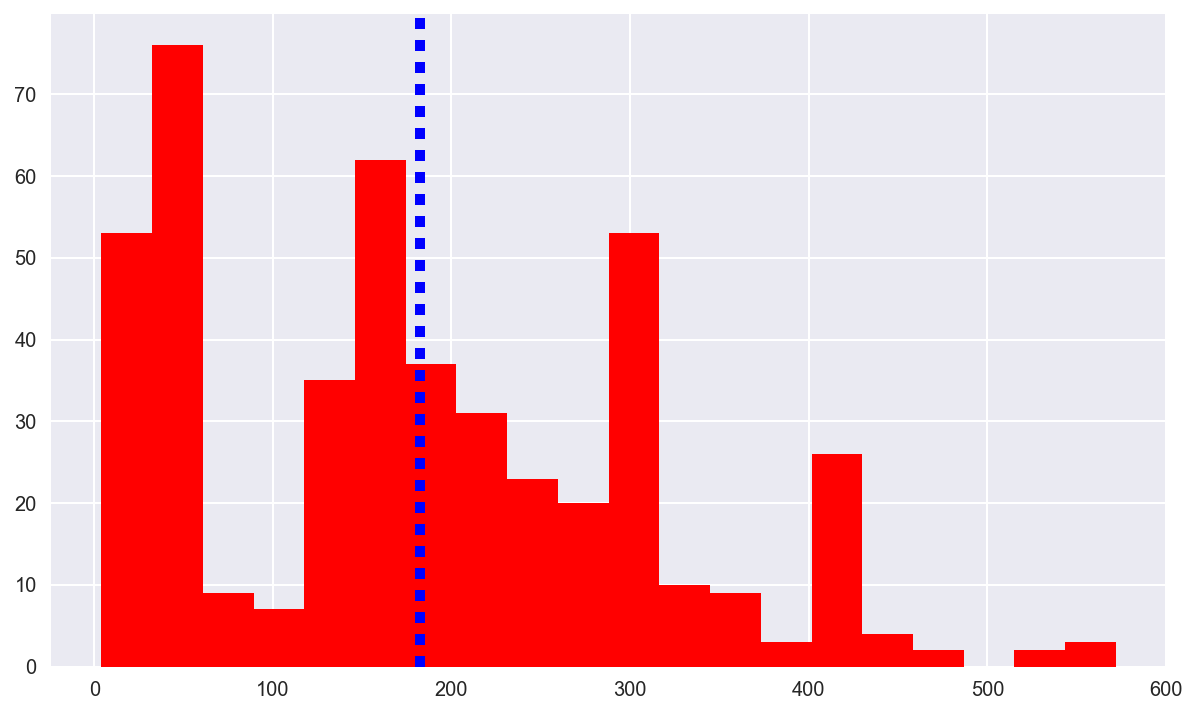

In [118]:
fig = plt.figure(figsize=(10,6))
result = plt.hist(DF['Food_Deficit'], bins=20, color='r')
plt.axvline(DF['Food_Deficit'].mean(), color='b', linestyle='dotted', linewidth=5)

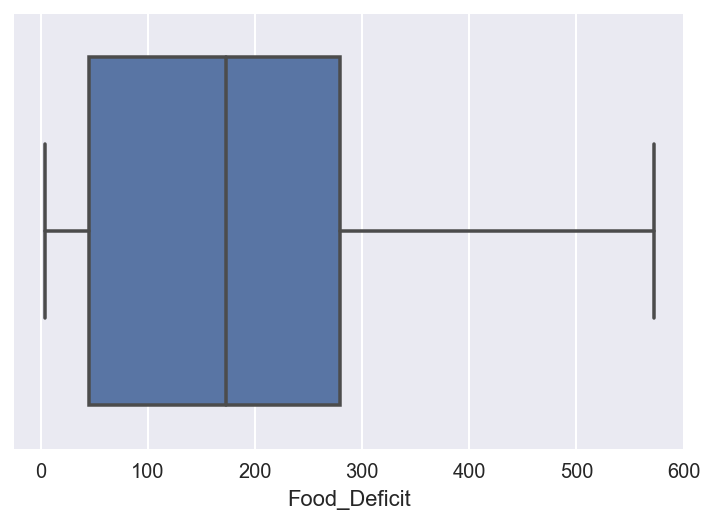

In [119]:
sns.boxplot(DF.Food_Deficit, orient='h', fliersize=10)

In [120]:
DF.head(100)

Country  Food_Deficit  AFF_Total_Credit        AFF_VA  \
Country_Code                                                                    
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                       Algeria    136.000000      23006.964000   5205.105224   
7                       Algeria    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    168.000000      16757.230000   3097.318202   
7                        Angola    149.000000      17115.790000   4047.197713   
7                        Angola    132.000000      22930.110000   5191.299280   
7                        Angola    120.000000      27908.280000   6364.495179   
7                        Angola    111.000000      30323.410000   7325.215746   
7                        Angola    136.000000      23006.964000   5205.105224   
7                        Angola    136.000000      23006.964000   5205.105224   
20                     Botswana    236.368421       1960.047895    212.596707   
20                     Botswana    236.368421       1960.047895    212.596707   
20                     Botswana    236.368421       1960.047895    212.596707   
20                     Botswana    236.368421       1960.047895    212.596707   
20                     Botswana    236.368421       1960.047895    212.596707   
20                     Botswana    213.000000        641.690000    218.018074   
20                     Botswana    211.000000        541.060000    210.980846   
20                     Botswana    210.000000        520.270000    196.345453   
20                     Botswana    214.000000        701.630000    186.486534   
20                     Botswana    232.000000        906.240000    202.532774   
20                     Botswana    253.000000        966.850000    180.673172   
20                     Botswana    262.000000        935.080000    194.083961   
20                     Botswana    266.000000       1047.380000    154.325278   
20                     Botswana    263.000000       1472.590000    185.391890   
20                     Botswana    262.000000       1802.630000    186.259596   
20                     Botswana    253.000000       1778.260000    181.580561   
20                     Botswana    245.000000       1849.340000    205.800642   
20                     Botswana    240.000000       2187.590000    230.980583   
20                     Botswana    243.000000       2512.180000    235.539807   
20                     Botswana    244.000000       2762.310000    250.549288   
20                     Botswana    239.000000       3256.330000    265.123155   
20                     Botswana    227.000000       408

In [121]:
# #Previewing the basic list of countries in the dataframe and years under consideration.
# pd.set_option('display.max_rows', 400)
# DF.groupby(['Country_Code'])[['Year']].count()

In [122]:
#Taking logs of all key variables to normaloze the distribution and also obtain elasticities over time
DF['log_food_security'] = DF.Food_Deficit.apply(np.log)
DF['log_upop'] = DF.Urban_Pop.apply(np.log)
DF['log_rpop'] = DF.Rural_Pop.apply(np.log)
DF['log_AGVA'] = DF.AFF_VA.apply(np.log)
DF['log_GDP'] = DF.GDP_PC.apply(np.log)
DF['log_pop'] = DF.Total_Pop.apply(np.log)
DF['log_FDI'] = DF.FDI_Total.apply(np.log)
DF['log_Agric_ODA'] = DF.ODA_Agriculture.apply(np.log)
DF['log_total_credit'] = DF.AFF_Total_Credit.apply(np.log)


### Tracing the correlation between food deficit and population growth rate across all countries

In [ ]:
#Source: Class mid term solution key
Country_food_deficit = DF.groupby('Country')[['log_food_security','log_pop']].agg(np.sum).reset_index()
Country_food_deficit.head(50)

In [ ]:
Country_food_deficit.sort_values('log_food_security', ascending=False, inplace=True)
Country_food_deficit.head(30)

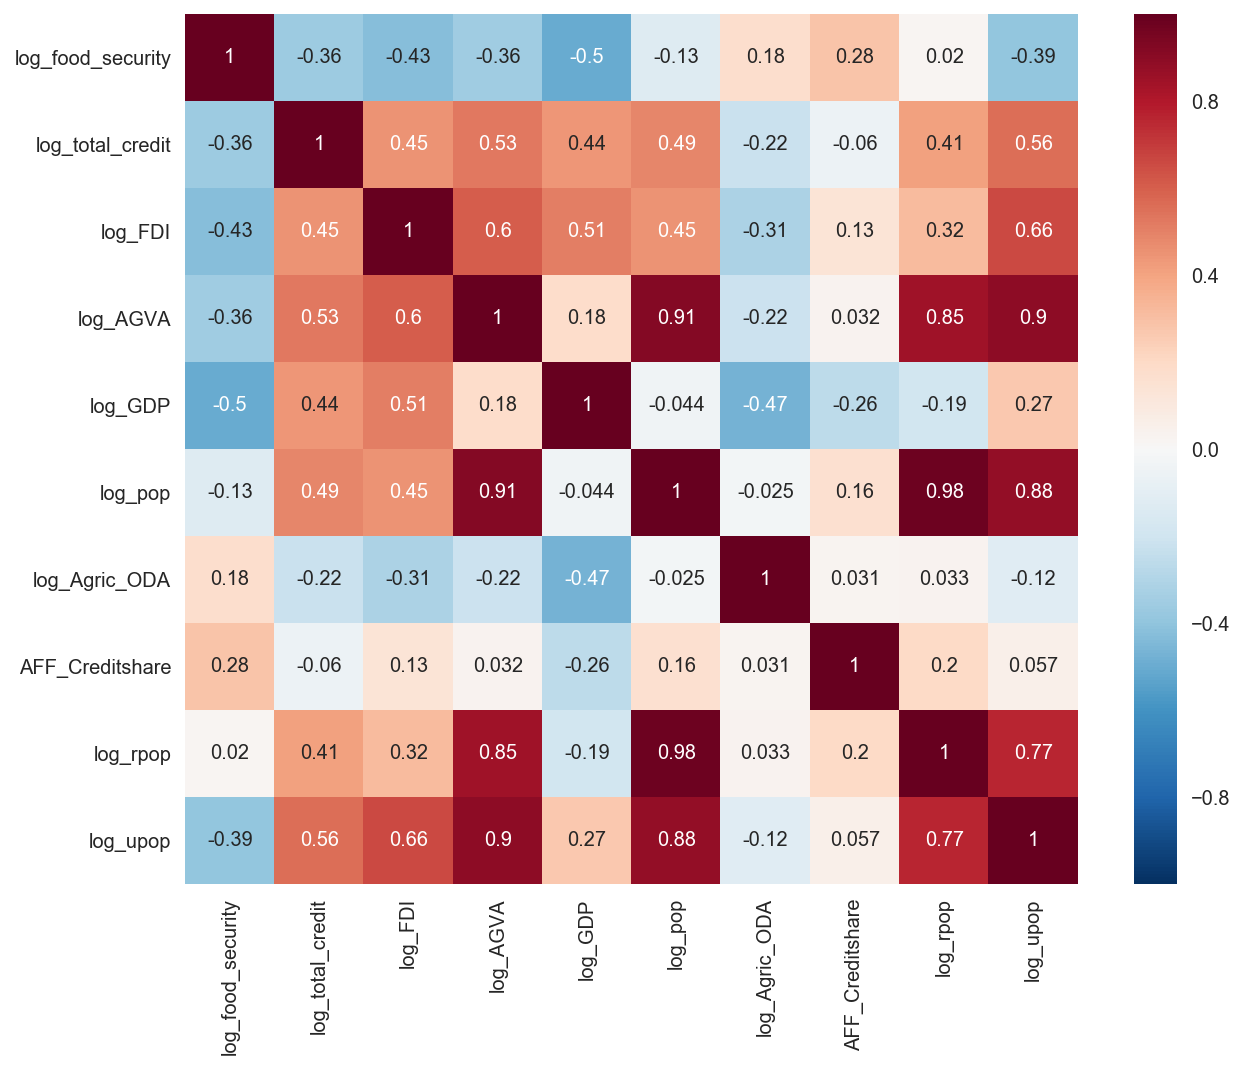

In [124]:
#Correlation matrix obtained to show the relationship between store size, sales, and proift in 2015. Source: Class jupter notebook
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.heatmap(DF[['log_food_security', 'log_total_credit', 'log_FDI','log_AGVA','log_GDP','log_pop','log_Agric_ODA','AFF_Creditshare','log_rpop','log_upop']].corr(),annot=True, ax=ax)
plt.show()

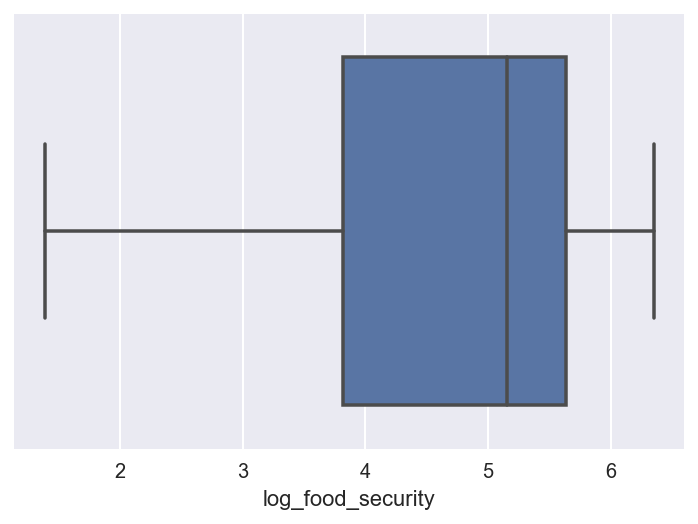

In [125]:
sns.boxplot(DF.log_food_security, orient='h', fliersize=10)

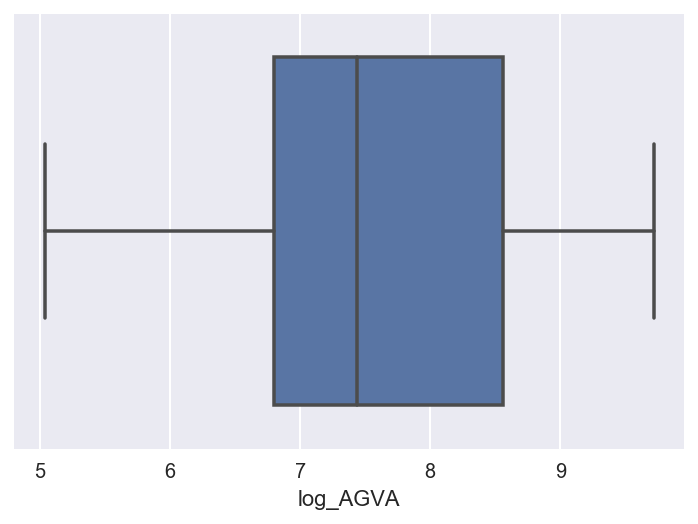

In [126]:
sns.boxplot(DF.log_AGVA, orient='h', fliersize=10)


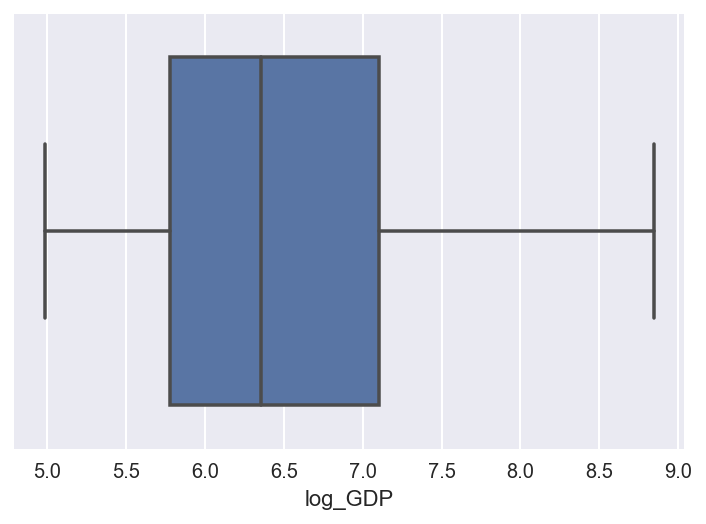

In [127]:
sns.boxplot(DF.log_GDP, orient='h', fliersize=10)


In [128]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

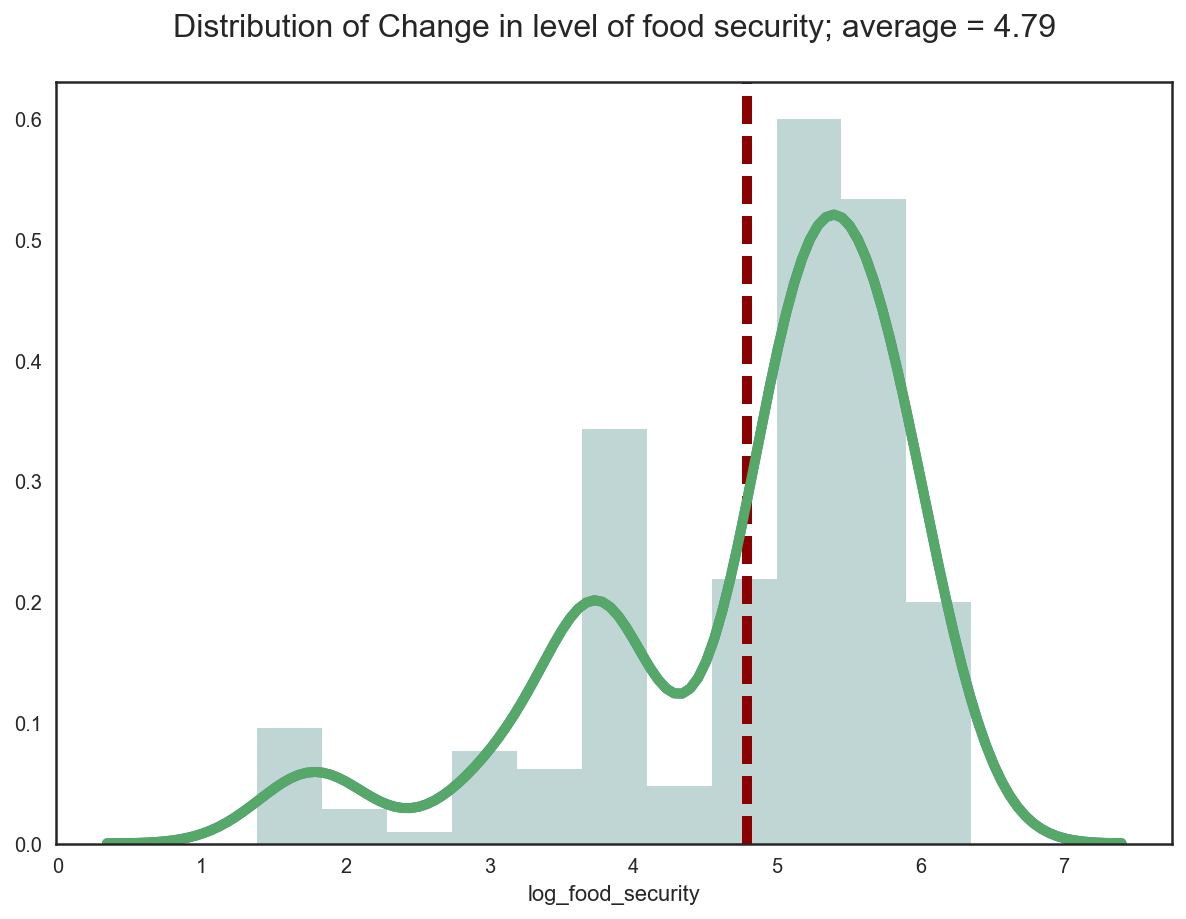

In [129]:
histogram_plotter("Change in level of food security", DF.log_food_security)

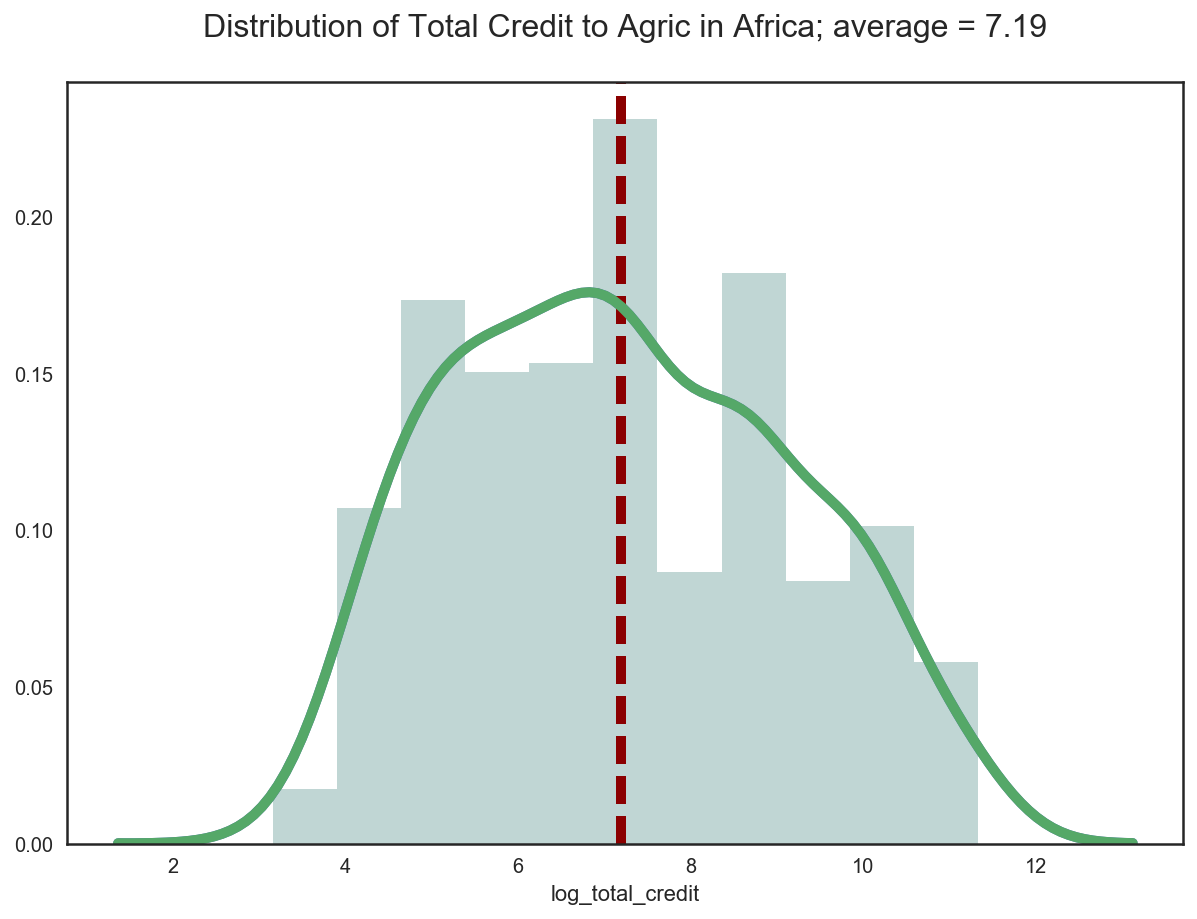

In [130]:
histogram_plotter("Total Credit to Agric in Africa", DF.log_total_credit)

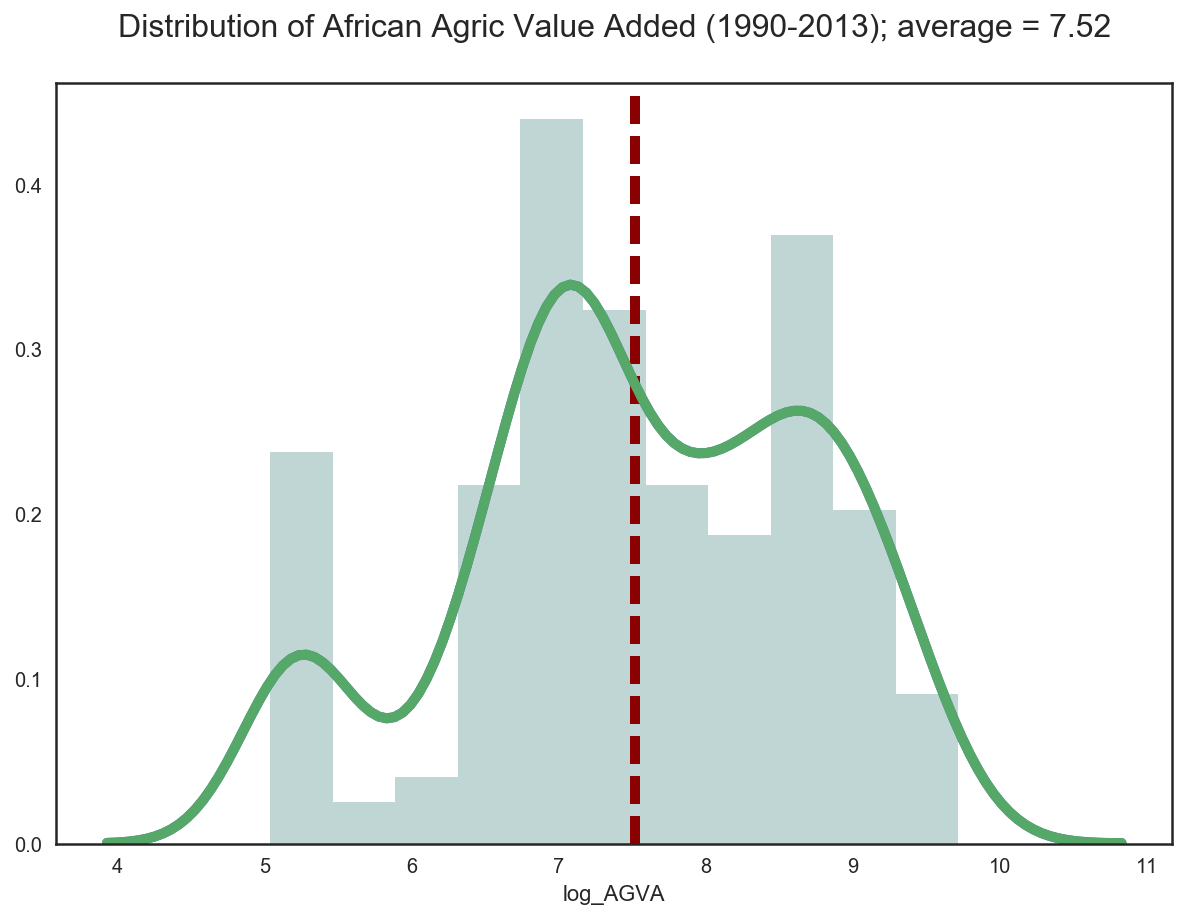

In [131]:
histogram_plotter("African Agric Value Added (1990-2013)", DF.log_AGVA)

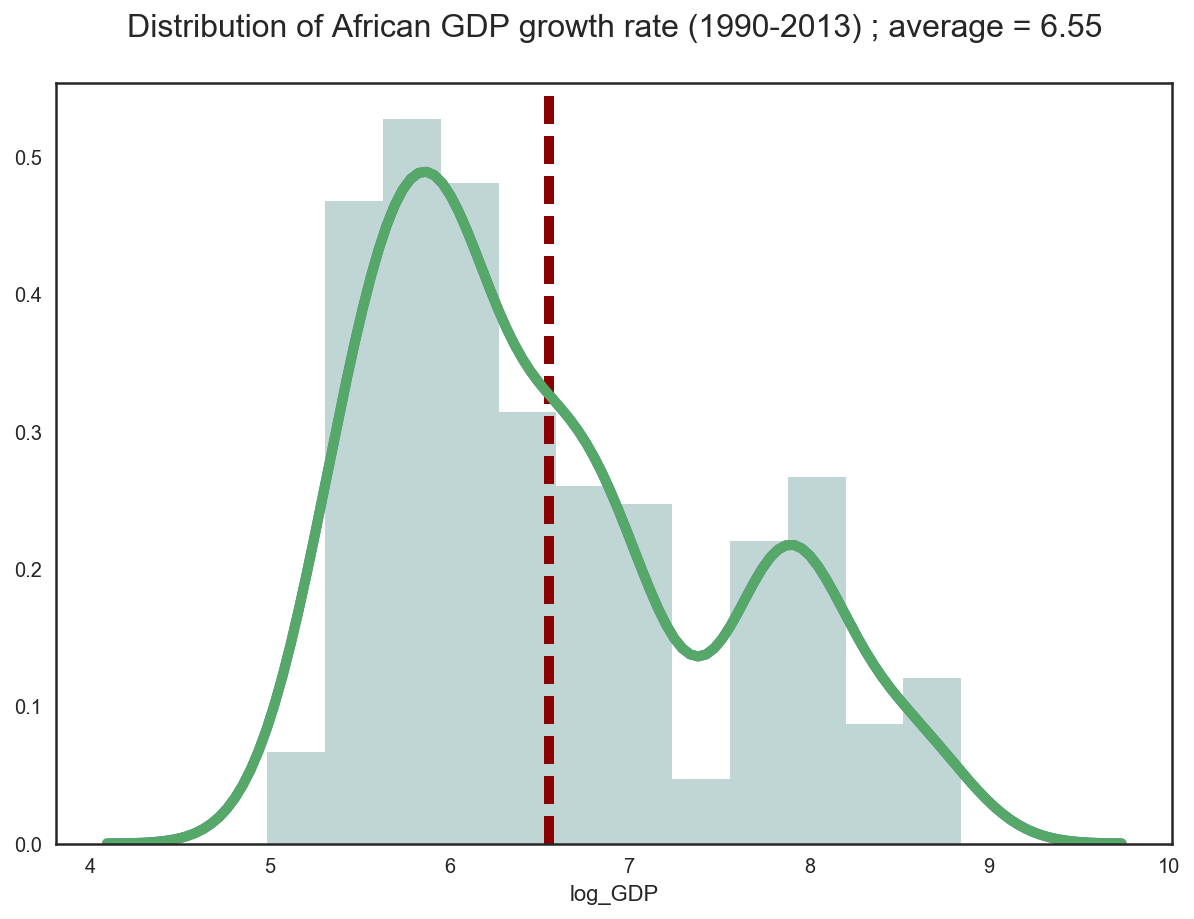

In [132]:
histogram_plotter("African GDP growth rate (1990-2013) ", DF.log_GDP)

In [133]:
DF.head(1)

Country  Food_Deficit  AFF_Total_Credit       AFF_VA  FDI_Total  \
Country_Code                                                                   
7             Angola         136.0         23006.964  5205.105224  -1696.938   

              AFF_Creditshare       GDP_PC  ODA_Agriculture  Rural_Pop  \
Country_Code                                                             
7                    0.022944  2647.277561            0.065     7690.0   

              Urban_Pop        ...         Year  log_food_security  log_upop  \
Country_Code                   ...                                             
7              2643.556        ...         1990           4.912655   7.87988   

              log_rpop  log_AGVA   log_GDP   log_pop  log_FDI  log_Agric_ODA  \
Country_Code                                                                   
7             8.947676  8.557395  7.881287  9.317208      NaN      -2.733368   

              log_total_credit  
Country_Code                    
7                    10.043552  

[1 rows x 21 columns]

In [ ]:
#Source: Class note
fig, axarr = plt.subplots(3, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(DF.log_food_security ,ax=axarr[0,0], color='blue')

axarr[0,1] = sns.distplot(DF.log_pop ,ax=axarr[0,1], color='green')

                          
axarr[1,0] = sns.regplot(DF.log_GDP,
                       DF.log_AGVA, ax=axarr[1,0], color='chocolate')

axarr[1,1] = sns.regplot(DF.log_total_credit,
                       DF.log_food_security, ax=axarr[1,1], color='red')

axarr[2,0] = sns.regplot(DF.ODA_Agriculture,
                       DF.log_food_security, ax=axarr[2,0], color='aquamarine')

axarr[2,1] = sns.regplot(DF.log_FDI,
                       DF.log_food_security, ax=axarr[2,1], color='cyan')

plt.show()

# Linear Regression

In [135]:
# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [136]:
# Define your linear model 
lm = linear_model.LinearRegression() 

# Define the target variable, called it y
target = 'log_food_security'
y = DF[target]
print type(y)


# The food insecurity predictors are the X explanatory variables
X = DF[['log_pop','log_GDP','log_AGVA','log_total_credit','log_upop','log_rpop','AFF_Creditshare']]
print type(X)

# The shapes of y and X are printed
print y.shape, X.shape

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(465,) (465, 7)


In [137]:
# Fitting the model
model = lm.fit(X, y)

# I Predict y and the shapes of the predictions
# Print the shape of predictions
predictions = lm.predict(X)
predictions.shape

(465,)

In [138]:
## Is there a difference between the means for actual values (malnutrition) and the predictions
print DF['log_food_security'].mean()
print predictions.mean()

4.79027397854
4.79027397854


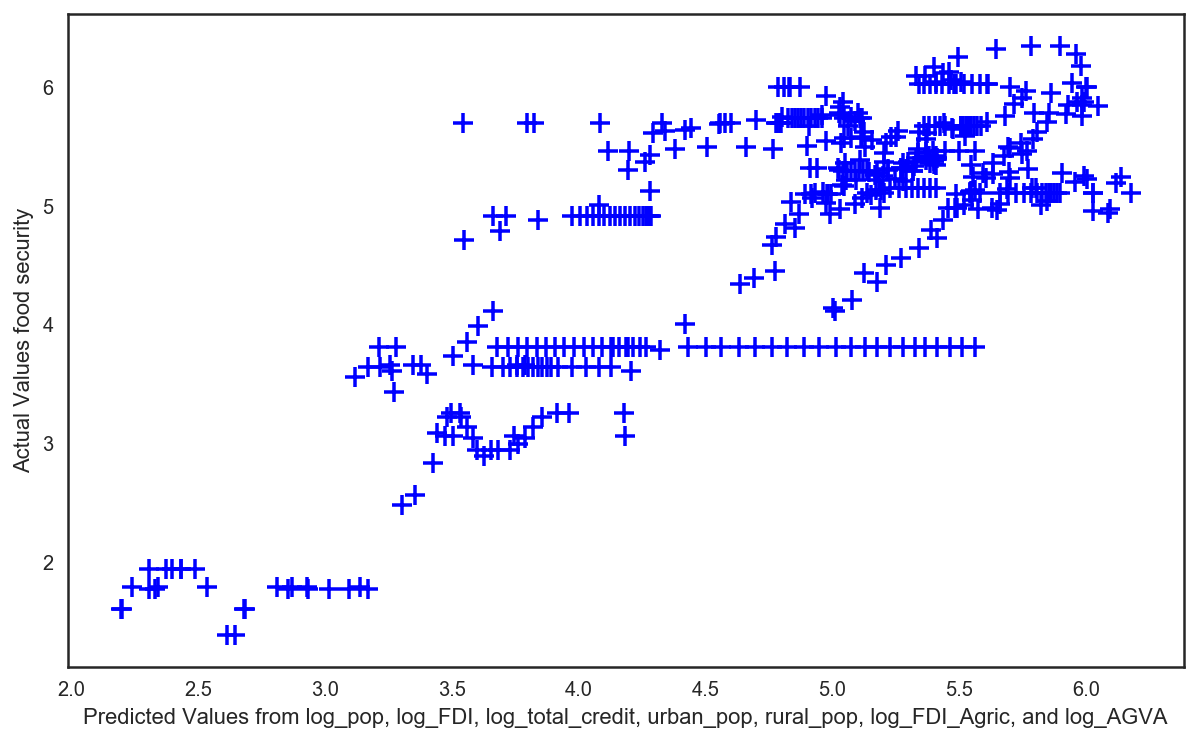

MSE: 0.440612129475


In [139]:
## The scatter plot of the model is constructed using predicted values on the y axis and y values on the x axis
## The Mean Square error see is subsequently printed 

## s = s: size in points, c = color, where s is size, c is color

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from log_pop, log_FDI, log_total_credit, urban_pop, rural_pop, log_FDI_Agric, and log_AGVA")
plt.ylabel("Actual Values food security")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [140]:
# accuracy of the model
score_r2 = model.score(X, y)
score_r2

0.65013277054566543

In [141]:
## estimated coefficients of the model.
model.coef_

array([-5.92440376,  0.29814413, -0.63532194, -0.11082534,  1.18422038,
        5.12195271,  3.02443717])

In [142]:
## intercept of the model.
lm.intercept_

8.4533990123323655

In [143]:
# dfi.drop(['Zimbabwe'])
# dfi.tail()

### Regularization of the model. Code source: using class notes and lab solutions

In [144]:
# Relevant model is regularized. 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV


In [145]:

y = DF.log_food_security.values
col_list = DF.columns.tolist()
exclude_cols = ['log_pop','log_GDP','log_AGVA','log_total_credit','log_upop','log_rpop','AFF_Creditshare']
X = DF[[i for i in col_list if i not in exclude_cols]]
print y.shape, X.shape

(465,) (465, 14)


In [146]:
# returning floats of the respective variables
# dfi['Crop_Production'] = dfi['Crop_Production'].float.replace(',','.')
# dfi.Crop_Production = dfi.Crop_Production.convert_objects(convert_numeric=True)
# dfi['log_pop'] = dfi['log_pop'].float.replace(',','.')
# dfi.log_pop = dfi.log_pop.convert_objects(convert_numeric=True)
# dfi['log_AGVA'] = dfi['log_AGVA'].float.replace(',','.')
# dfi.log_AGVA = df.log_AGVA.convert_objects(convert_numeric=True)
# dfi['log_total_credit'] = dfi['log_total_credit'].float.replace(',','.')
# dfi.log_total_credit = dfi.log_total_credit.convert_objects(convert_numeric=True)
# dfi['log_FDI'] = dfi['log_FDI'].float.replace(',','.')
# dfi.log_FDI = dfi.log_FDI.convert_objects(convert_numeric=True)


In [147]:
#Converting string to floats. Source: Stack overflow : http://stackoverflow.com/questions/30121181/how-to-convert-string-into-float-value-in-the-dataframe
# dfi['Crop_Production_Quantity'] = dfi['Crop_Production_Quantity'].astype(float)
# dfi['log_pop'] = dfi['log_pop'].astype(float)
# dfi['log_AGVA'] = dfi['log_AGVA'].astype(float)
# dfi['log_total_credit'] = dfi['log_total_credit'].astype(float)
# dfi['log_FDI'] = dfi['log_FDI'].astype(float)
# dfi['log_food_security'] = dfi['log_food_security'].astype(float)
# dfi['Crop_Production'] = dfi['Crop_Production'].astype(float)
# dfi['Crop_Production'] = dfi['Crop_Production'].astype(float)
# dfi['Crop_Production'] = dfi['Crop_Production'].astype(float)
# dfi['Crop_Production'] = dfi['Crop_Production'].astype(float)
# dfi['Crop_Production'] = dfi['Crop_Production'].astype(float)
# dfi['Crop_Production'] = dfi['Crop_Production'].astype(float)
# dfi['Crop_Production'] = dfi['Crop_Production'].astype(float)



In [148]:
##Converting the variables to string
# dfi['Zambia'] = dfi['Crop_Production'].astype('int')
# dfi['Zambia'] = dfi['log_pop'].astype('int')
# dfi['Zambia'] = dfi['log_AGVA'].astype('int')
# dfi['Zambia'] = dfi['log_total_credit'].astype('int')
# dfi['Zambia'] = dfi['log_FDI'].astype('int')
# dfi['Zambia'] = dfi['log_food_security'].astype('int')


In [149]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='log_food_security ~ log_pop+log_GDP+log_AGVA+log_total_credit+log_upop+log_rpop+AFF_Creditshare', data=DF).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_food_security   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 01 May 2017   Prob (F-statistic):          5.02e-100
Time:                        16:25:25   Log-Likelihood:                -469.25
No. Observations:                 465   AIC:                             954.5
Df Residuals:                     457   BIC:                             987.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            8.4534      0.586     14.415      0.000         7.301     9.606
log_pop             -5.9244      0.555    -10.673      0.000        -7.015    -4.834
log_GDP              0.2981      0.055      5.441      0.000         0.190     0.406
log_AGVA            -0.6353      0.081     -7.809      0.000        -0.795    -0.475
log_total_credit    -0.1108      0.022     -5.040      0.000        -0.154    -0.068
log_upop             1.1842      0.169      6.988      0.000         0.851     1.517
log_rpop             5.1220      0.379     13.500      0.000         4.376     5.868
AFF_Creditshare      3.0244      0.594      5.088      0.000         1.856     4.193
==============================================================================
Omnibus:                        0.328   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.445
Skew:                           0.027   Prob(JB):                        0.800
Kurtosis:                       2.858   Cond. No.                         519.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Define Variables and exlpore new models

In [150]:
#Define the Y and X
X = DF[['log_pop','log_GDP','log_AGVA','log_total_credit','log_upop','log_rpop','AFF_Creditshare']]
Y = DF.log_food_security.values

In [151]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## Employed to normalize the distribution

# The "fit_transform" function is emlpoyed to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [152]:
#The data is split into train and test

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(325, 7) (140, 7)


(325,) (140,)


/Users/jjonoja/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [153]:
from sklearn.linear_model import LinearRegression

## The linear regression model is defined as follows:
lr = LinearRegression()

## The model is fitted
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [155]:
#The MSE, and the best model is obtained after carrying out the prediction 

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    #The model is called
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
#The R^2 of the model is called
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [156]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.46, test data: 0.41
R^2 OLS train data: 0.67, test data: 0.56


### Regularized Regression methods are employed

In [157]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [158]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

1.0


In [159]:
## The Ridge Regression is Implemented
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Ridge regression is fitted
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [160]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)



MSE Ridge train data: 0.52, test data: 0.44
R^2 Ridge train data: 0.63, test data: 0.54


In [161]:
## The optimal alpha is fitted
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000649133253313


..........................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
/Users/jjonoja/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Lasso Regression is implemented

In [162]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)

Lasso(alpha=0.00064913325331329578, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
## The Lasso Regression model is Evaluated
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 0.46, test data: 0.41
R^2 Lasso train data: 0.67, test data: 0.57


In [164]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)


MSE Lasso train data: 0.46, test data: 0.41
R^2 Lasso train data: 0.67, test data: 0.57


### Elastic Net Regression Model is Implemented

In [165]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000649133253313
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   21.4s finished


In [166]:
##  A model Enet, is created for Elastic net
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## my model is Fitted
enet.fit(X_train, y_train)

ElasticNet(alpha=0.00064913325331329578, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [167]:
## The Elastic Net Regression is Evaluated
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 0.46, test data: 0.41
R^2 Elastic Net train data: 0.67, test data: 0.57


In [168]:
## Fit
ridge.fit(X_train, y_train)
enet.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.00064913325331329578, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [169]:
# residuals:
ridge_resid = y_test - ridge.predict(X_test)
lasso_resid = y_test - lasso.predict(X_test)
enet_resid = y_test - enet.predict(X_test)

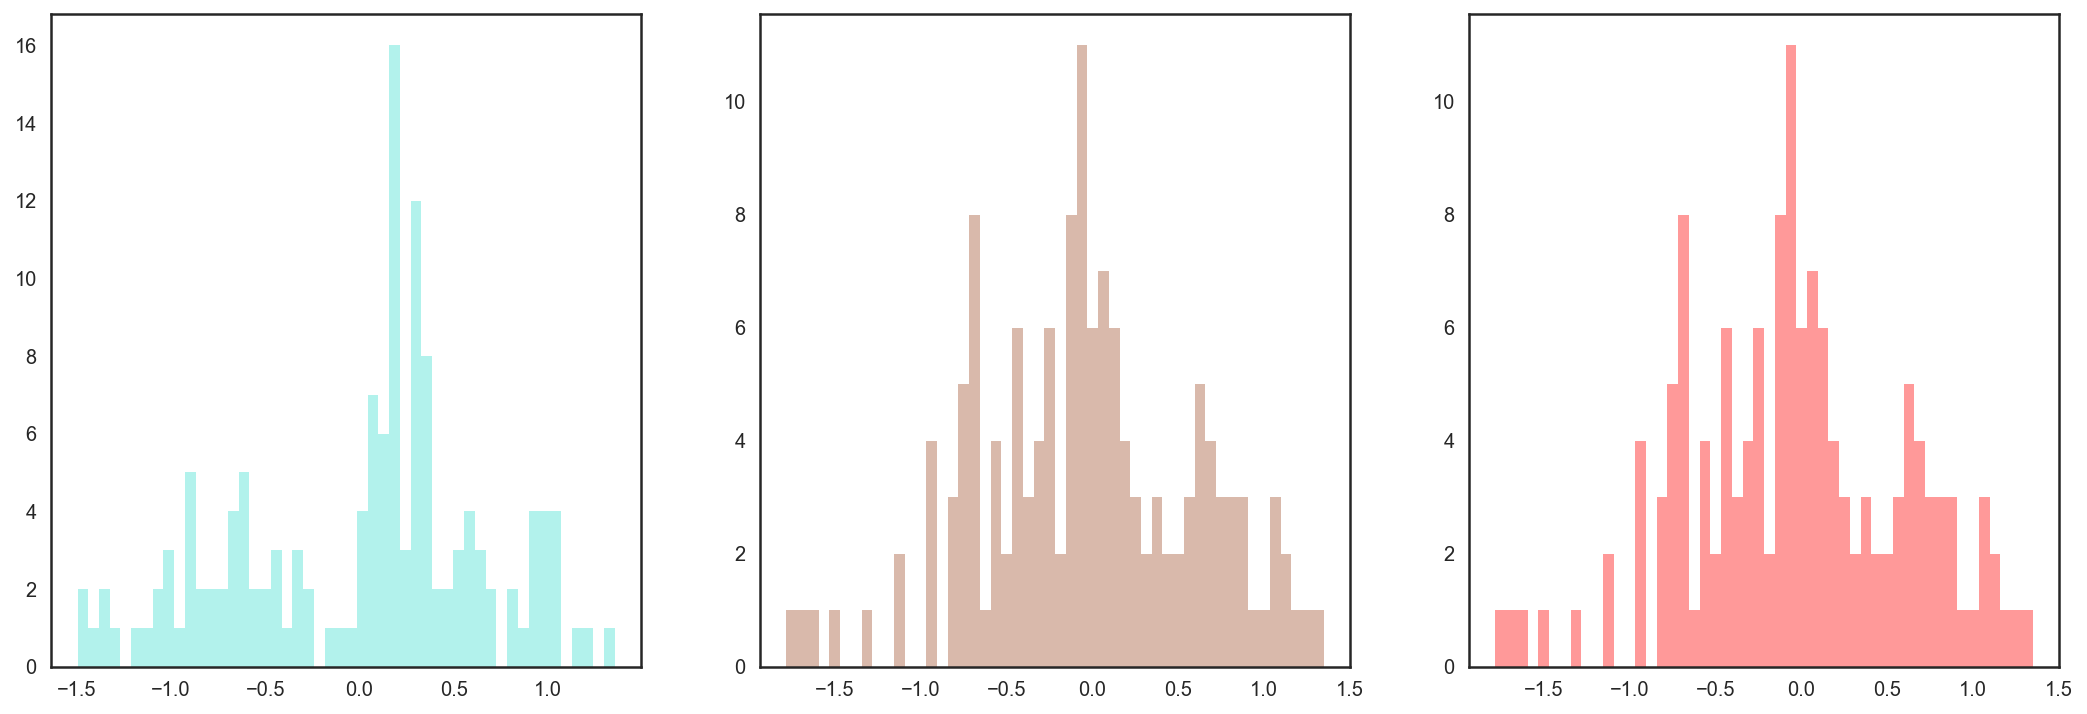

In [170]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='turquoise', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='sienna', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='red', ax=axarr[2], label='ElasticNet residuals')

plt.show()

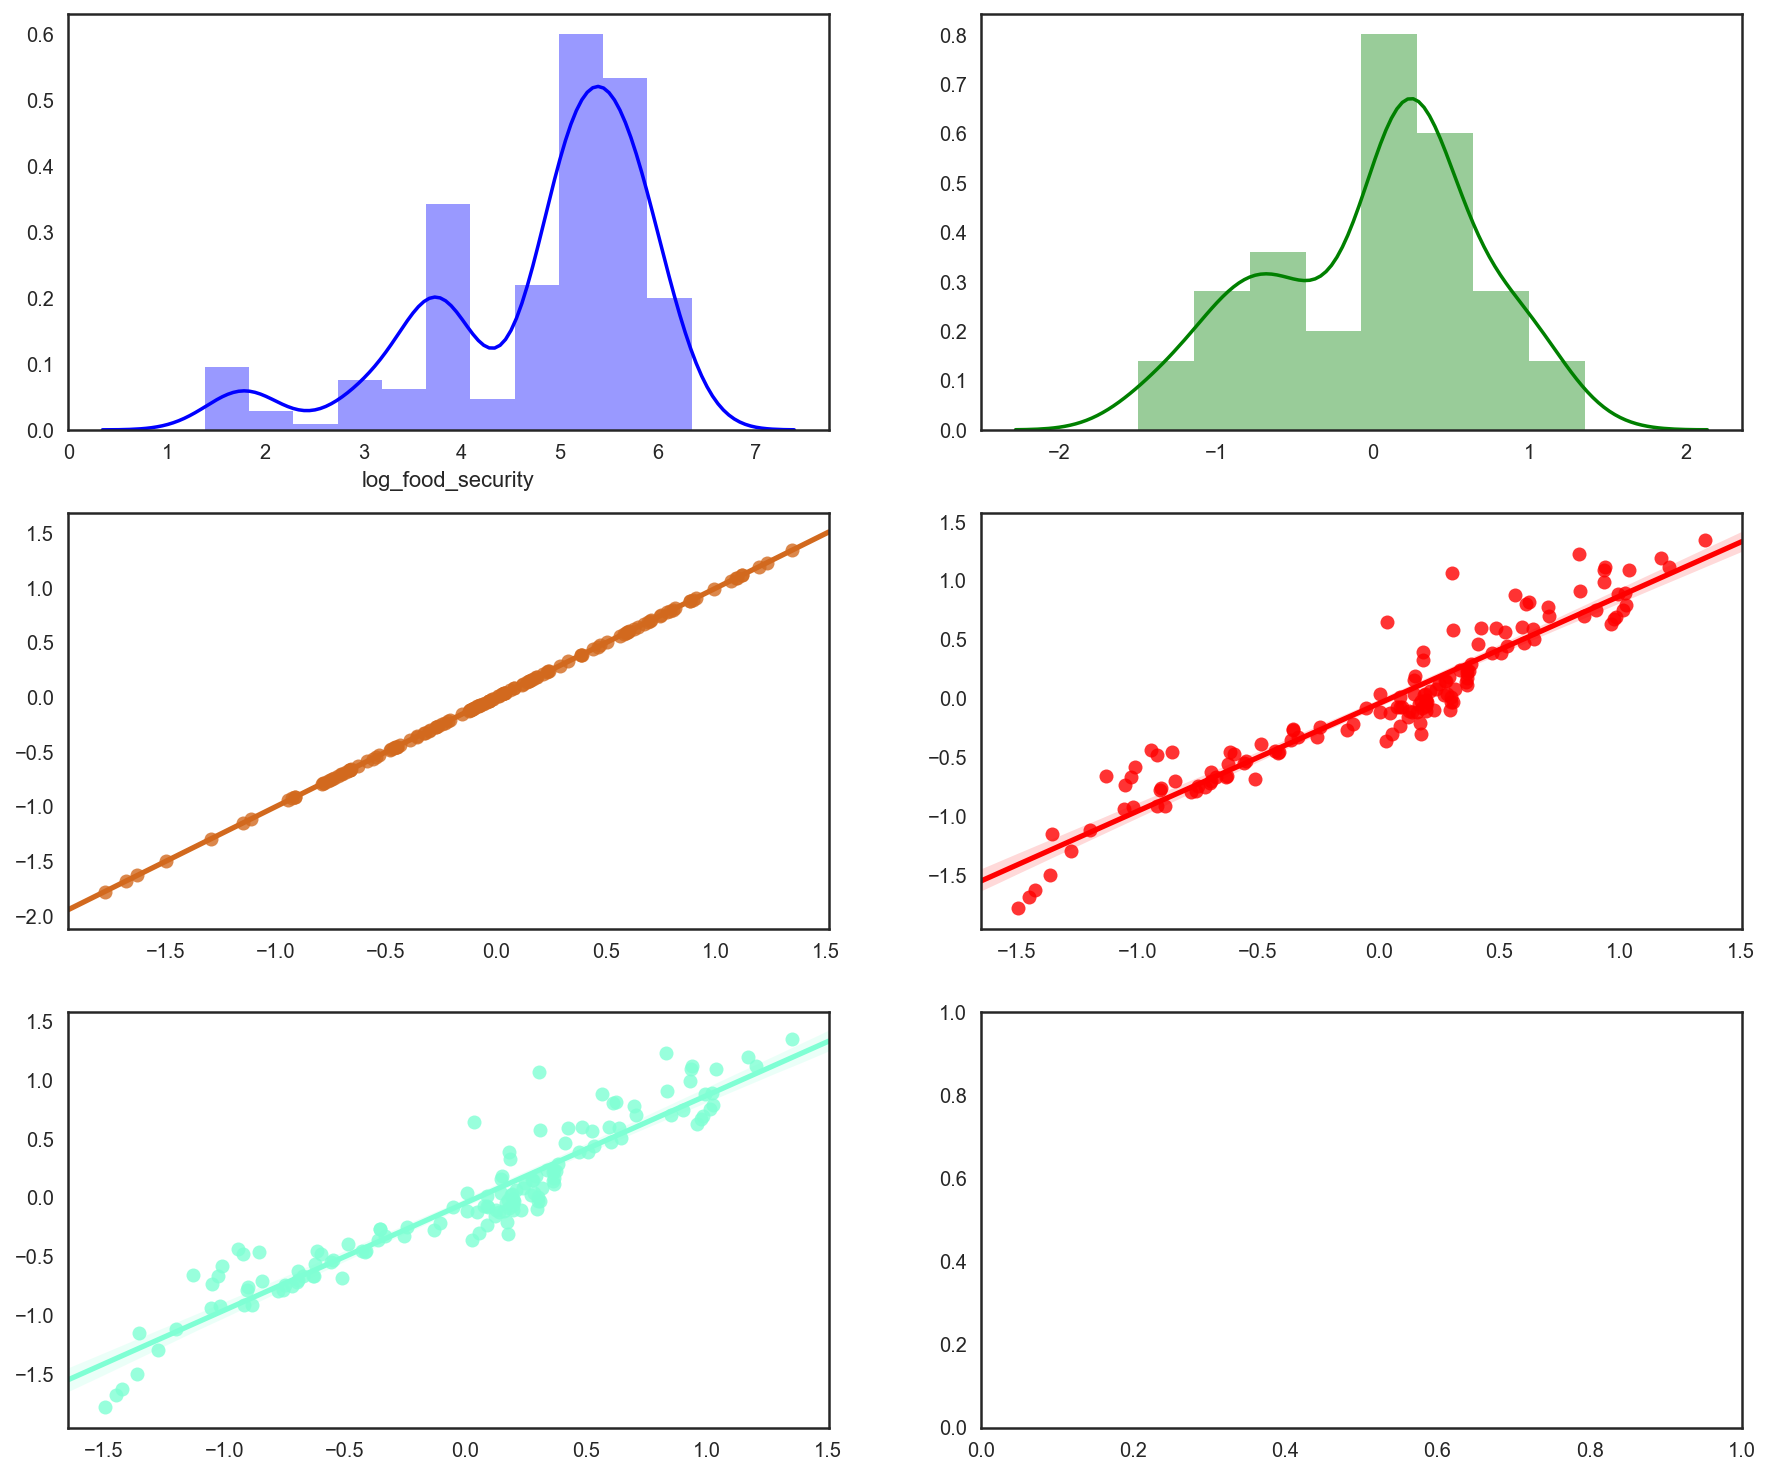

In [171]:
fig, axarr = plt.subplots(3, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(DF.log_food_security ,ax=axarr[0,0], color='blue')

axarr[0,1] = sns.distplot(ridge_resid ,ax=axarr[0,1], color='green')       
                          
axarr[1,0] = sns.regplot(lasso_resid,
                       enet_resid, ax=axarr[1,0], color='chocolate')

axarr[1,1] = sns.regplot(ridge_resid,
                       lasso_resid, ax=axarr[1,1], color='red')

axarr[2,0] = sns.regplot(ridge_resid,
                       enet_resid, ax=axarr[2,0], color='aquamarine')

plt.show()

Best Peforming regularization method

In [202]:
# I define a function to print the coefficients, their absolute values and the non-absolute values
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    return method_coefs.head(10)

In [206]:
best_reg_method(X, lasso)

abs_coef      coef          variable
0  6.224615 -6.224615           log_pop
5  5.977164  5.977164          log_rpop
4  1.164182  1.164182          log_upop
2  0.777760 -0.777760          log_AGVA
1  0.262306  0.262306           log_GDP
3  0.201438 -0.201438  log_total_credit
6  0.143503  0.143503   AFF_Creditshare

### Decision Tree (DT) Implemented

In [174]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

/Users/jjonoja/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [175]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [176]:
## Print Best Estimator, parameters and score
# dtr_best = is the regression tree regressor with best parameters/estimators
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 1}


best score 0.926486666325


In [177]:
## Print the features that best explain your Y
#  defining a function to print feature importance using best models
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [178]:
feature_importance(X, dtr_best)

feature  importance
3  log_total_credit    0.423529
5          log_rpop    0.291814
2          log_AGVA    0.202632
1           log_GDP    0.031447
6   AFF_Creditshare    0.024549
4          log_upop    0.023181
0           log_pop    0.002847

In [179]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 5.66894004,  5.50125821,  5.33271879,  5.10594547,  6.24997524,
        4.91265489,  6.02586597,  3.8140426 ,  5.34233425,  3.81035935,
        5.69786758,  5.23644196,  5.1108919 ,  5.69786758,  5.34233425,
        3.81035935,  3.64414356,  5.73715862,  5.13579844,  4.11087386,
        5.73715862,  5.10594547,  4.79579055,  5.29064092,  4.91265489,
        3.8140426 ,  5.66894004,  5.73715862,  5.27811466,  5.99893656,
        5.37063803,  3.8140426 ,  5.49716823,  6.02586597,  5.1108919 ,
        5.70711026,  3.64414356,  4.91265489,  5.1108919 ,  3.81035935,
        3.66356165,  3.73766962,  5.99893656,  5.47646355,  3.64414356,
        5.99893656,  5.15329159,  4.91265489,  3.81035935,  4.91265489,
        5.69786758,  4.11087386,  6.02586597,  5.10594547,  2.94443898,
        3.81035935,  3.04452244,  5.46539169,  6.02586597,  5.5683445 ,
        5.58349631,  5.78382518,  5.1108919 ,  3.8140426 ,  5.10594547,
        5.1108919 ,  6.02586597,  5.73715862,  5.64897424,  3.13

In [180]:
## The Regression Tree performance on the train and test data is Evaluated
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.00, test data: 0.08
R^2 Regression tree train data: 1.00, test data: 0.91


In [208]:
## the tree is Visualized
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

Evaluate the DT

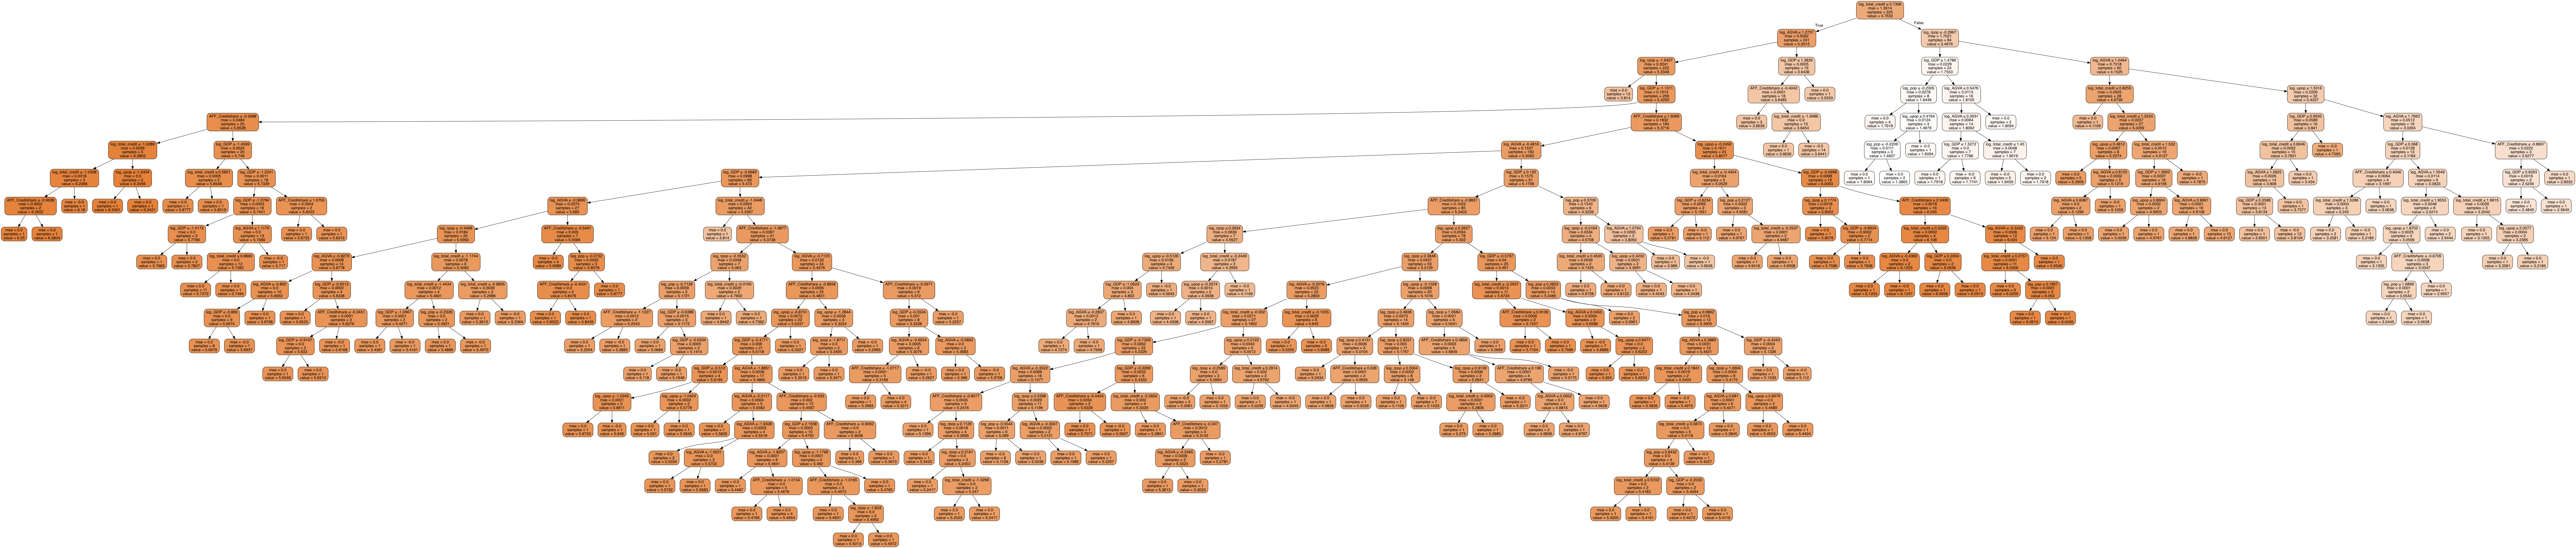

In [209]:
dot_data = StringIO()
# dtr_best is same as previously defined

## Graphics
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [183]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(325, 7) (325,)
(140, 7) (140,)


### Random Forest is Implemented

In [184]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [185]:
##  The random forest tree is Fitted
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   16.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [186]:
## the best estimator, parameters and score are Printed
# rfr_best = is the random forest regression tree regressor with best parameters/estimators
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 3}


best score 0.88533838658


In [187]:
## Print the feauure importance
feature_importance(X, rfr_best)

feature  importance
3  log_total_credit    0.325585
1           log_GDP    0.198119
2          log_AGVA    0.175045
5          log_rpop    0.140793
6   AFF_Creditshare    0.062285
0           log_pop    0.057191
4          log_upop    0.040983

In [ ]:
feature_importance(X, rfr_best)

In [188]:
## Prediction of the model
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 5.40525714,  5.35880644,  5.42645938,  5.43559817,  5.50709942,
        4.87882846,  5.50018973,  4.61664191,  5.43559817,  3.80913143,
        5.4712431 ,  5.44017096,  5.40525714,  5.46863541,  5.43559817,
        3.80913143,  3.63808632,  5.5188459 ,  5.04396198,  5.04396198,
        5.51623821,  5.0413543 ,  5.38457622,  5.04396198,  5.0085707 ,
        3.82249004,  5.40089548,  5.50384748,  5.42757482,  5.42645938,
        5.43559817,  3.82249004,  5.40089548,  5.50018973,  5.40525714,
        5.39371501,  3.63808632,  5.0085707 ,  5.40525714,  3.79075244,
        3.64653072,  4.42363938,  5.43559817,  5.35880644,  3.63808632,
        5.42645938,  5.40089548,  4.66259771,  3.77981833,  4.99465369,
        5.4712431 ,  5.38457622,  5.50018973,  5.43559817,  3.28416528,
        3.80913143,  3.21194966,  5.35880644,  5.48201949,  5.35880644,
        5.40089548,  5.43255456,  5.40525714,  4.28041758,  4.95510562,
        5.40525714,  5.47443772,  5.50384748,  5.42645938,  3.21

In [189]:
## My model performance is Evaluated
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.11, test data: 0.14
R^2 Random Forest Regression tree train data: 0.92, test data: 0.85


## Summarizing the performance of all models to determine the best at predicting food insecurity prevalence in Africa

In [190]:
## Summarizing the performance of various Models employed in the analysis 

# MSE OLS train data: 0.46, test data: 0.41
# R^2 OLS train data: 0.67, test data: 0.56

# MSE Ridge train data: 0.52, test data: 0.44
# R^2 Ridge train data: 0.63, test data: 0.54

# MSE Lasso train data: 0.46, test data: 0.41
# R^2 Lasso train data: 0.67, test data: 0.57
    
# MSE Elastic Net train data: 0.46, test data: 0.41
# R^2 Elastic Net train data: 0.67, test data: 0.57
        
# MSE Regression tree train data: 0.02, test data: 0.12
# R^2 Regression tree train data: 0.99, test data: 0.87
        
# MSE Random Forest Regression tree train data: 0.11, test data: 0.15
# R^2 Random Forest Regression tree train data: 0.92, test data: 0.85
    


In [191]:
''' Function to print the coefficients, their absolute values and the non-absolute values'''
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(8)

In [192]:
best_reg_method(X, lasso)

abs_coef      coef          variable
0  6.224615 -6.224615           log_pop
5  5.977164  5.977164          log_rpop
4  1.164182  1.164182          log_upop
2  0.777760 -0.777760          log_AGVA
1  0.262306  0.262306           log_GDP
3  0.201438 -0.201438  log_total_credit
6  0.143503  0.143503   AFF_Creditshare

In [193]:
best_reg_method(X, enet)

abs_coef      coef          variable
0  6.224615 -6.224615           log_pop
5  5.977164  5.977164          log_rpop
4  1.164182  1.164182          log_upop
2  0.777760 -0.777760          log_AGVA
1  0.262306  0.262306           log_GDP
3  0.201438 -0.201438  log_total_credit
6  0.143503  0.143503   AFF_Creditshare

In [194]:
best_reg_method(X, ridge)

abs_coef      coef          variable
5  2.854320  2.854320          log_rpop
0  2.066716 -2.066716           log_pop
2  0.947036 -0.947036          log_AGVA
3  0.200839 -0.200839  log_total_credit
1  0.143010  0.143010           log_GDP
6  0.121064  0.121064   AFF_Creditshare
4  0.079174  0.079174          log_upop

In [195]:
best_reg_method(X, lr)

abs_coef      coef          variable
0  6.877907 -6.877907           log_pop
5  6.469920  6.469920          log_rpop
4  1.340012  1.340012          log_upop
2  0.757967 -0.757967          log_AGVA
1  0.283003  0.283003           log_GDP
3  0.203531 -0.203531  log_total_credit
6  0.147711  0.147711   AFF_Creditshare

### Decision Tree out-performs  all the other models explored to predict the prevalence of food insecurity in Africa. It has the lowest MSE of 0.02 and 0.12 on train and test components of the dataframe respectively, while also posting the highest R^2 of 99% and 87% on the train and test. The model also shows great level of consistency in terms of the variation between its train and test MSE and R^2 of .3 and +7 respectively.

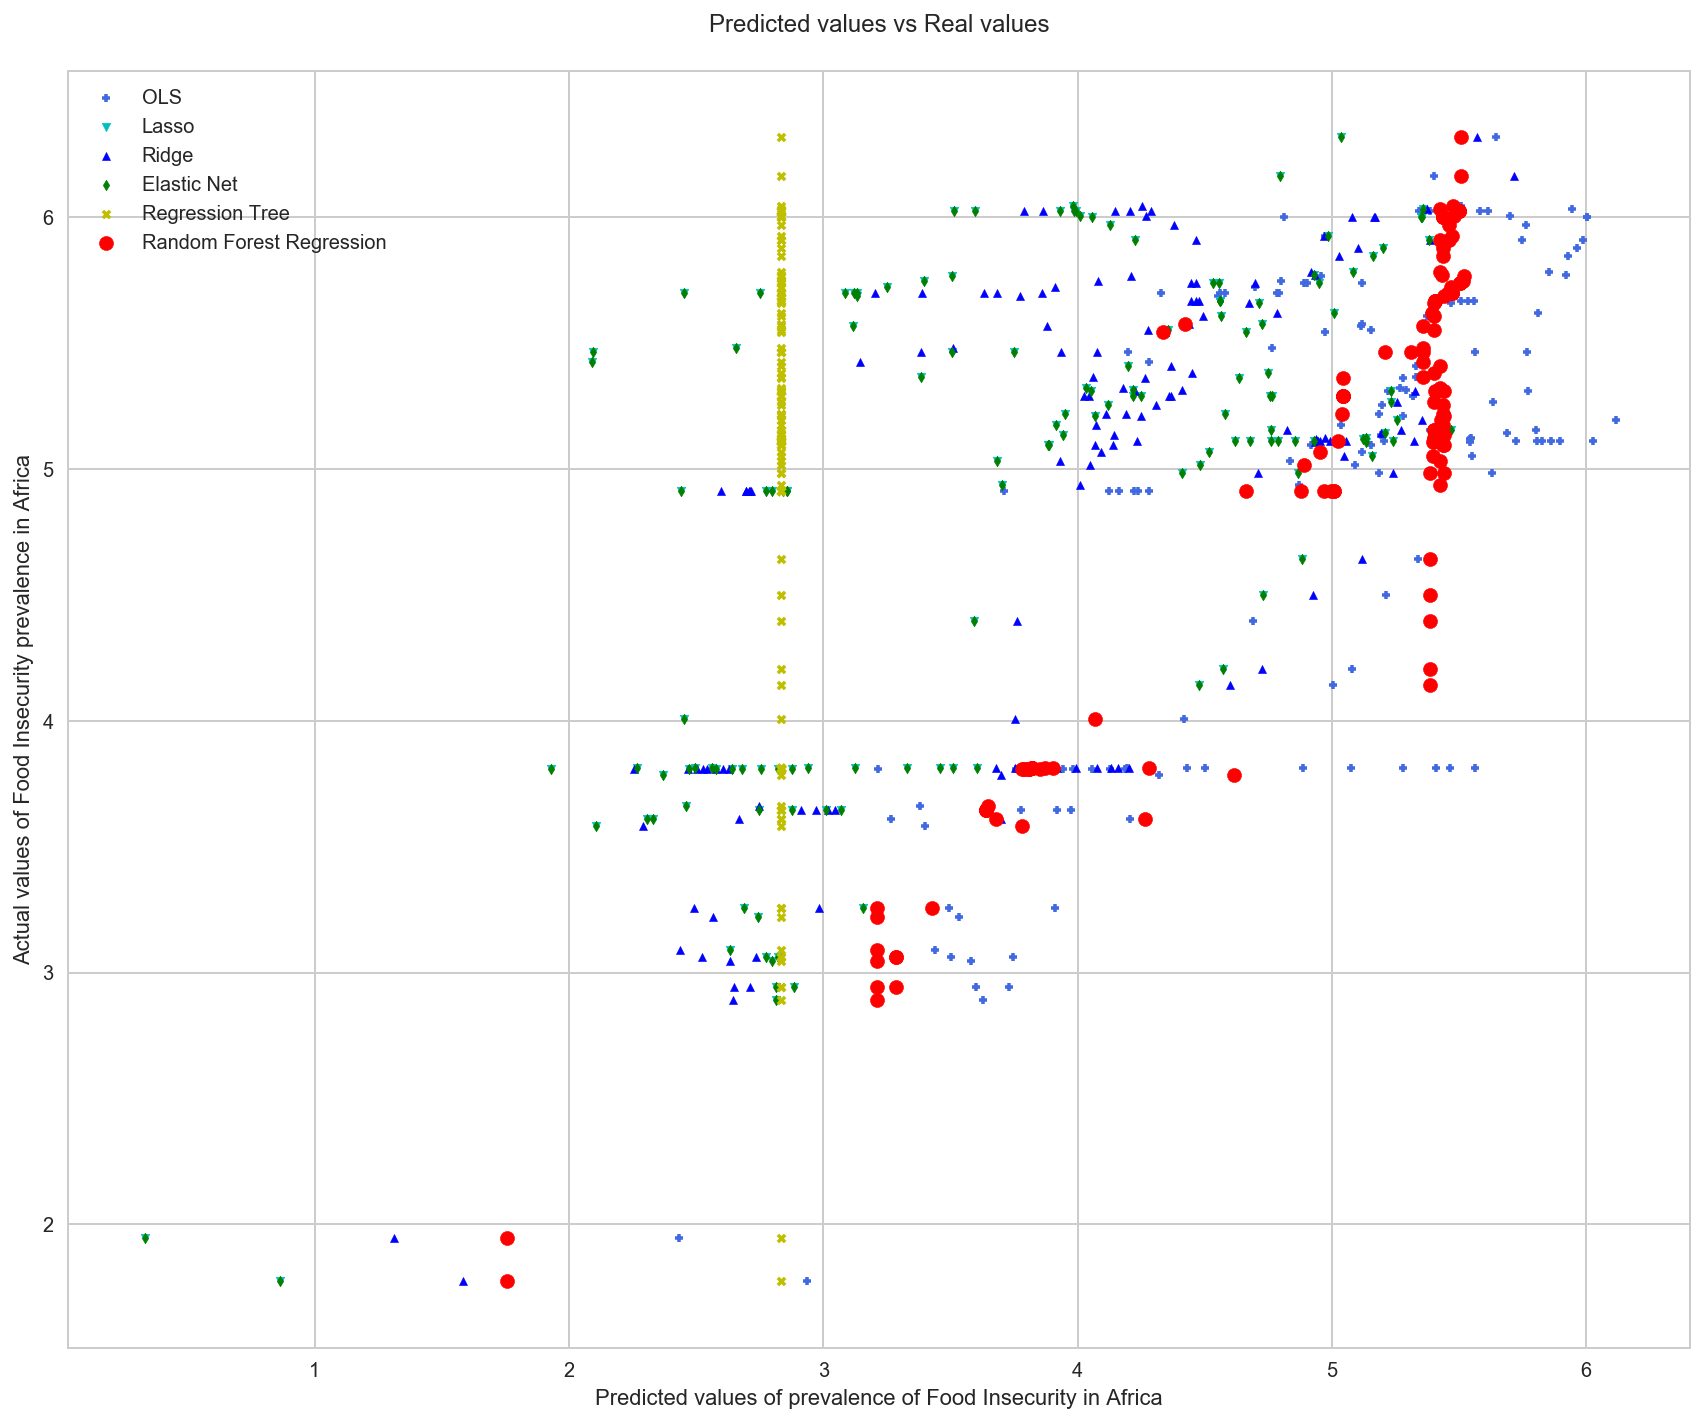

In [196]:
with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(12,10))
    plt.scatter(lm.predict(X_test), y_test, s=20, c='royalblue', marker='+', label="OLS")
    plt.scatter(lasso.predict(X_test), y_test, color='c', s=18, marker='v', label='Lasso')
    plt.scatter(ridge.predict(X_test), y_test, color='b', s=16, marker="^", label='Ridge')
    plt.scatter(enet.predict(X_test), y_test, color='g', s=14, marker="d", label='Elastic Net')
    plt.scatter(dtr_gs.predict(X_test), y_test, color='y', s=13, marker="x", label='Regression Tree' )
    plt.scatter(estimator_rfr.predict(X_test), y_test, color='r', marker='o', label='Random Forest Regression')
    
    plt.title('Predicted values vs Real values\n')
    plt.xlabel("Predicted values of prevalence of Food Insecurity in Africa")
    plt.ylabel("Actual values of Food Insecurity prevalence in Africa")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Analysis/ Report

#### The project has explored the issue of food security in Africa using structured dataset obtained from the Food and Agriculture Organization of the United Nations (FAO) from 1990-2015. The issue of Food security is pervasive and multi-dimensional, hence a multitude of factors simultaenously determines the extent of food deficit. Thus, while this study does not present all factors that determines food security in Africa, it does employ the level of food deficit (3 year averages) to predict its tendency using certain correlates.

#### In terms of the parameters that most explains food security, certain factors are significant contributors, while much attention is also given to factors that could reduce the extent of food insecurity, proxied by food deficit in the model.

#### Population negatively affects the level of food deficit, with the predicting from Ridge, Lasso, OLS, DT, Random Forest and elastic Net all sugestig that countries level of food deficit is likey to increase with increasing population. The distributional pattern appears to be different for urban and rural sub-sections of the population, with all models predicting higher food deficit/food insecurity at rural parts of the population compared to the urban populace. Thus, all models presents population as a significant predictor of food security in Africa


#### In terms of positive predictors (Reduce food insecurity), Agricultural Productivity is estimated to reduce food deficit by over 75%. This is expected considering the high level of dependence of most rural people in Africa on Agriculture as means of livelihood and major economic activity. Boosting Agricultural productivity in Africa is therefore able to significantly increase food security. This confirms World Bank reports and other empirical evidence that growth emanating from Agriculture is at least twice as effective in reducing poverty. This has implications for policy and appropriate intervention required to cut down the level of food insecurity in Africa. 

#### Interestingly, GDP growth is predicted to have impacted negatively on food security, with the results suggesting that economic growth in Africa has not contributed to reducing food deficit, rather it has excerbated the situation. This perhaps points more to distributional issues of economic gains across the countries in the continent. 

#### In terms of feature importance, Decision Tree and Random Forest both predict total credit as the most significant determinant of food security, followed by Agriculture value added (productivity) and rural population., confirming the report the incidence of poverty is highest among the rural populace than the urban population.
